# Machine Learning HWS24
## Assignment 2
### Cagan Yigit Deliktas, cdelikta, 1979012
### Nursultan Mamatov, nmamatov, 1983726

In [432]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random
import numpy.linalg
import scipy.io
import scipy.stats
import sklearn.metrics
%matplotlib inline

# setup plotting 
from IPython import get_ipython
import psutil
inTerminal = not "IPKernelApp" in get_ipython().config
inJupyterNb = any(filter(lambda x: x.endswith("jupyter-notebook"), psutil.Process().parent().cmdline()))
get_ipython().run_line_magic("matplotlib", "" if inTerminal else "notebook" if inJupyterNb else "widget")
def nextplot():
    if inTerminal:
        plt.clf()     # this clears the current plot
    else:
        plt.figure()  # this creates a new plot 

# Load the data

In [433]:
data = scipy.io.loadmat("data/spamData.mat")
X = data["Xtrain"]
N = X.shape[0]
D = X.shape[1]
Xtest = data["Xtest"]
Ntest = Xtest.shape[0]
y = data["ytrain"].squeeze().astype(int)
ytest = data["ytest"].squeeze().astype(int)

features = np.array(
    [
        "word_freq_make",
        "word_freq_address",
        "word_freq_all",
        "word_freq_3d",
        "word_freq_our",
        "word_freq_over",
        "word_freq_remove",
        "word_freq_internet",
        "word_freq_order",
        "word_freq_mail",
        "word_freq_receive",
        "word_freq_will",
        "word_freq_people",
        "word_freq_report",
        "word_freq_addresses",
        "word_freq_free",
        "word_freq_business",
        "word_freq_email",
        "word_freq_you",
        "word_freq_credit",
        "word_freq_your",
        "word_freq_font",
        "word_freq_000",
        "word_freq_money",
        "word_freq_hp",
        "word_freq_hpl",
        "word_freq_george",
        "word_freq_650",
        "word_freq_lab",
        "word_freq_labs",
        "word_freq_telnet",
        "word_freq_857",
        "word_freq_data",
        "word_freq_415",
        "word_freq_85",
        "word_freq_technology",
        "word_freq_1999",
        "word_freq_parts",
        "word_freq_pm",
        "word_freq_direct",
        "word_freq_cs",
        "word_freq_meeting",
        "word_freq_original",
        "word_freq_project",
        "word_freq_re",
        "word_freq_edu",
        "word_freq_table",
        "word_freq_conference",
        "char_freq_;",
        "char_freq_(",
        "char_freq_[",
        "char_freq_!",
        "char_freq_$",
        "char_freq_#",
        "capital_run_length_average",
        "capital_run_length_longest",
        "capital_run_length_total",
    ]
)

In [434]:
import pandas as pd

In [435]:
test_df = pd.concat([pd.DataFrame(Xtest, columns=features.tolist()), pd.DataFrame(ytest, columns=['Spam'])], axis=1)
display(test_df.head())
print(test_df.shape)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485.0,2259.0,1
2,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,...,0.00,0.271,0.0,0.181,0.203,0.022,9.744,445.0,1257.0,1
3,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,...,0.04,0.030,0.0,0.244,0.081,0.000,1.729,43.0,749.0,1
4,0.00,0.69,0.34,0.0,0.34,0.00,0.00,0.00,0.00,0.00,...,0.00,0.056,0.0,0.786,0.000,0.000,3.728,61.0,261.0,1


(1536, 58)


In [436]:
train_df = pd.concat([pd.DataFrame(X, columns=features.tolist()), pd.DataFrame(y, columns=['Spam'])], axis=1)
display(train_df.head())
print(train_df.shape)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Spam
0,0.21,0.28,0.5,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0,1
1,0.00,0.00,0.0,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.137,0.0,0.137,0.000,0.000,3.537,40.0,191.0,1
2,0.00,0.00,0.0,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0,1
3,0.00,0.00,0.0,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.223,0.0,0.000,0.000,0.000,3.000,15.0,54.0,1
4,0.00,0.00,0.0,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.0,0.054,0.0,0.164,0.054,0.000,1.671,4.0,112.0,1


(3065, 58)


In [437]:
train_df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Spam
count,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,...,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000
mean,0.110819,0.228486,0.274153,0.062969,0.317788,0.095755,0.113546,0.107217,0.088923,0.241719,...,0.037954,0.138396,0.018183,0.265471,0.079128,0.053422,4.900629,52.675041,282.203915,0.397390
std,0.327252,1.373834,0.484063,1.334772,0.663570,0.260613,0.373958,0.414731,0.264054,0.685420,...,0.235502,0.278921,0.121674,0.871310,0.259719,0.519230,27.245399,220.584047,607.414933,0.489438
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.600000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.280000,15.000000,97.000000,0.000000
75%,0.000000,0.000000,0.410000,0.000000,0.390000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.191000,0.000000,0.315000,0.056000,0.000000,3.737000,43.000000,272.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,9.090000,3.570000,7.270000,11.110000,3.330000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


# 1. Dataset Statistics

In [438]:
# look some dataset statistics
scipy.stats.describe(X)

DescribeResult(nobs=3065, minmax=(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1.]), array([4.5400e+00, 1.4280e+01, 5.1000e+00, 4.2810e+01, 9.0900e+00,
       3.5700e+00, 7.2700e+00, 1.1110e+01, 3.3300e+00, 1.8180e+01,
       2.0000e+00, 9.6700e+00, 5.5500e+00, 5.5500e+00, 2.8600e+00,
       1.0160e+01, 7.1400e+00, 9.0900e+00, 1.8750e+01, 6.3200e+00,
       1.1110e+01, 1.7100e+01, 5.4500e+00, 9.0900e+00, 2.0000e+01,
       1.4280e+01, 3.3330e+01, 4.7600e+00, 1.4280e+01, 4.7600e+00,
       4.7600e+00, 4.7600e+00, 1.8180e+01, 4.7600e+00, 2.0000e+01,
       7.6900e+00, 6.8900e+00, 7.4000e+00, 9.7500e+00, 4.7600e+00,
       7.1400e+00, 1.4280e+01, 3.5700e+00, 2.0000e+01, 2.1420e+01,
       1.6700e+01, 2.1200e+00, 1.0000e+01, 4.3850e+00, 9.7520e+00,
       4.0810e+00, 3.2478e+01, 6.0030e

In [25]:
scipy.stats.describe(y)

DescribeResult(nobs=3065, minmax=(0, 1), mean=0.39738988580750406, variance=0.23954932085067235, skewness=0.41936632478193103, kurtosis=-1.824131885638896)

<IPython.core.display.Javascript object>


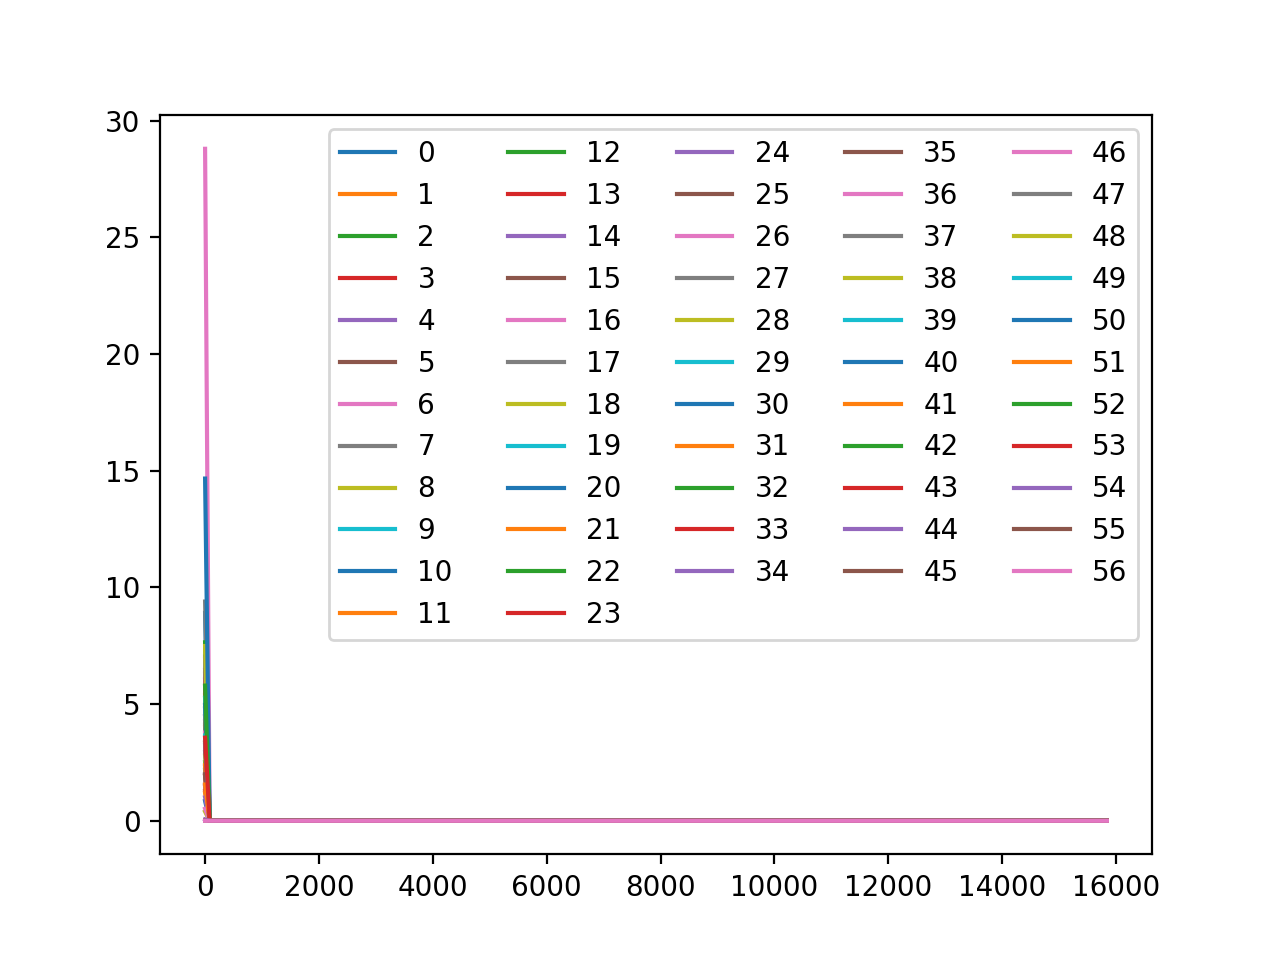

In [26]:
# plot the distribution of all features
nextplot()
densities = [scipy.stats.gaussian_kde(X[:, j]) for j in range(D)]
xs = np.linspace(0, np.max(X), 200)
for j in range(D):
    plt.plot(xs, densities[j](xs), label=j)
plt.legend(ncol=5)

<IPython.core.display.Javascript object>


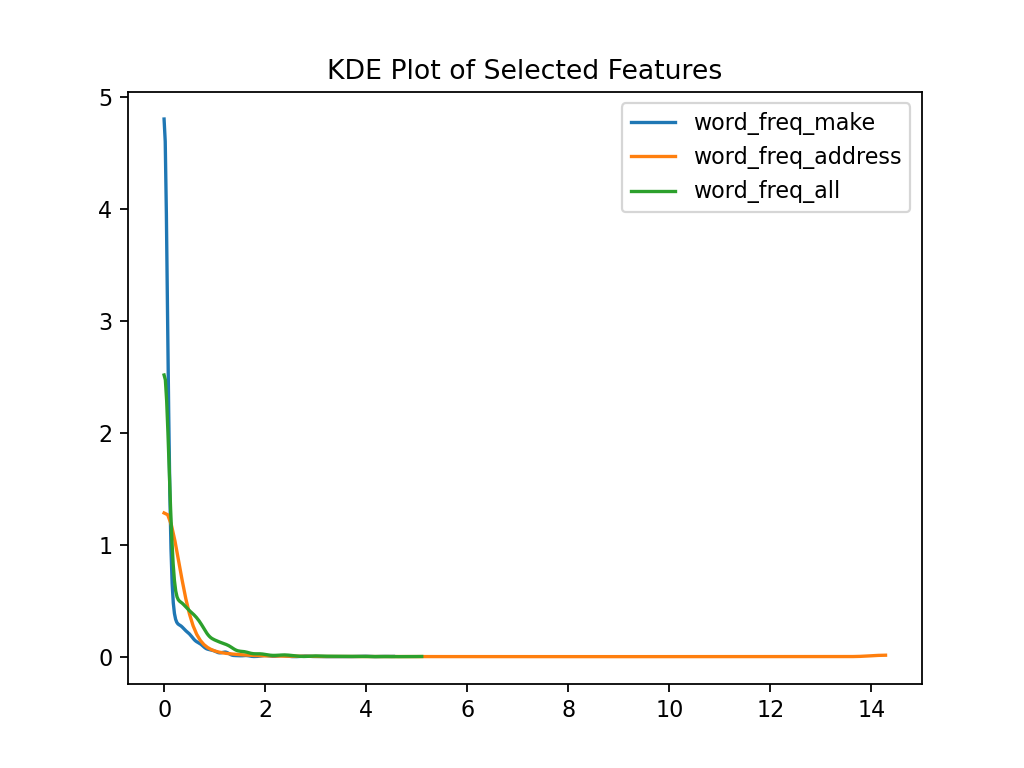

In [58]:
# this plots is not really helpful; go now explore further
# YOUR CODE HERE

selected_features = [0, 1, 2]

def plot_selected_features(X, feature_names, selected_features):
    """
    Plots kernel density estimates for the specified features.
    """
    nextplot()  # Clear or create a new plot
    
    for j in selected_features:
        density = scipy.stats.gaussian_kde(X[:, j])
        xs = np.linspace(0, np.max(X[:, j]), 200)
        plt.plot(xs, density(xs), label=feature_names[j])
    
    plt.legend(ncol=1)
    plt.title("KDE Plot of Selected Features")
    plt.show()

plot_selected_features(X, features, selected_features)

In [37]:
np.mean(X, axis=0)

array([1.10818923e-01, 2.28486134e-01, 2.74153344e-01, 6.29690049e-02,
       3.17787928e-01, 9.57553018e-02, 1.13546493e-01, 1.07216966e-01,
       8.89233279e-02, 2.41719413e-01, 5.81305057e-02, 5.37432300e-01,
       9.26231648e-02, 4.96639478e-02, 5.07210440e-02, 2.35334421e-01,
       1.47197390e-01, 1.86600326e-01, 1.66121044e+00, 7.63066884e-02,
       8.19592170e-01, 1.22727569e-01, 1.02006525e-01, 8.90799347e-02,
       5.29800979e-01, 2.62071778e-01, 7.71507341e-01, 1.14323002e-01,
       1.09487765e-01, 9.92952692e-02, 6.28156607e-02, 4.90342577e-02,
       9.27471452e-02, 4.96019576e-02, 1.02156607e-01, 9.93050571e-02,
       1.43285481e-01, 1.24274062e-02, 7.55921697e-02, 6.60456770e-02,
       4.63360522e-02, 1.32176183e-01, 4.88580750e-02, 7.11876020e-02,
       3.06590538e-01, 1.79794454e-01, 5.28874388e-03, 3.13768352e-02,
       3.79543230e-02, 1.38396411e-01, 1.81830343e-02, 2.65470799e-01,
       7.91275693e-02, 5.34218597e-02, 4.90062936e+00, 5.26750408e+01,
      

In [38]:
# Let's compute z-scores; create two new variables Xz and Xtestz.
mean_train = np.mean(X, axis=0)
std_train = np.std(X, axis=0)  

Xz = (X - mean_train) / std_train
Xtestz = (Xtest - mean_train) / std_train 

In [45]:
# Let's check. Xz and Xtestz refer to the normalized datasets just created. We
# will use them throughout.
print("mean train -- # should be all 0\n", np.mean(Xz, axis=0), '\n')  # should be all 0
print("var train -- # should be all 1\n", np.var(Xz, axis=0), '\n')  # should be all 1
print("mean test -- # what do you get here?\n",np.mean(Xtestz, axis=0), '\n')  # what do you get here?
print("var test -- \n", np.var(Xtestz, axis=0), '\n')

print("should be: 1925261.15\n", np.sum(Xz ** 3), '\n')  # should be: 1925261.15

mean train -- # should be all 0
 [ 1.85459768e-17  9.27298839e-18 -5.56379304e-17 -9.27298839e-18
  5.56379304e-17  3.70919536e-17  0.00000000e+00 -7.41839072e-17
  5.56379304e-17  0.00000000e+00 -1.85459768e-17 -2.43415945e-17
 -4.63649420e-17  1.85459768e-17  1.85459768e-17  3.70919536e-17
 -3.70919536e-17 -9.27298839e-17 -1.66913791e-16  9.27298839e-18
  1.85459768e-17  9.27298839e-18 -5.56379304e-17 -1.85459768e-17
 -6.49109188e-17 -3.70919536e-17 -1.85459768e-17  1.85459768e-17
 -2.78189652e-17  4.63649420e-17 -1.85459768e-17  5.56379304e-17
  0.00000000e+00 -1.85459768e-17  3.70919536e-17  1.85459768e-17
 -9.27298839e-18  4.63649420e-18  1.85459768e-17  9.27298839e-18
  2.31824710e-17 -2.78189652e-17 -9.27298839e-18  4.63649420e-18
 -9.27298839e-18 -9.27298839e-18  1.39094826e-17 -2.78189652e-17
 -3.70919536e-17 -6.49109188e-17  4.63649420e-18  3.70919536e-17
 -3.70919536e-17  9.27298839e-18 -9.27298839e-18  9.27298839e-18
 -7.41839072e-17] 

var train -- # should be all 1
 [1. 1

In [54]:
# Explore the normalized data
# YOUR CODE HERE

train_df_z = pd.concat([pd.DataFrame(Xz, columns=features.tolist()), pd.DataFrame(y, columns=['Spam'])], axis=1)
display(train_df_z.describe().round(3))

print('*****************************')

test_df_z = pd.concat([pd.DataFrame(Xtestz, columns=features.tolist()), pd.DataFrame(ytest, columns=['Spam'])], axis=1)
display(test_df_z.describe().round(3))

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Spam
count,3065.000,3065.000,3065.000,3065.000,3065.000,3065.000,3065.000,3065.000,3065.000,3065.000,...,3065.000,3065.000,3065.000,3065.000,3065.000,3065.000,3065.000,3065.000,3065.000,3065.000
mean,0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,0.000,...,-0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.397
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.489
min,-0.339,-0.166,-0.566,-0.047,-0.479,-0.367,-0.304,-0.259,-0.337,-0.353,...,-0.161,-0.496,-0.149,-0.305,-0.305,-0.103,-0.143,-0.234,-0.463,0.000
25%,-0.339,-0.166,-0.566,-0.047,-0.479,-0.367,-0.304,-0.259,-0.337,-0.353,...,-0.161,-0.496,-0.149,-0.305,-0.305,-0.103,-0.121,-0.212,-0.407,0.000
50%,-0.339,-0.166,-0.566,-0.047,-0.479,-0.367,-0.304,-0.259,-0.337,-0.353,...,-0.161,-0.260,-0.149,-0.305,-0.305,-0.103,-0.096,-0.171,-0.305,0.000
75%,-0.339,-0.166,0.281,-0.047,0.109,-0.367,-0.304,-0.259,-0.337,-0.119,...,-0.161,0.189,-0.149,0.057,-0.089,-0.103,-0.043,-0.044,-0.017,1.000
max,13.537,10.230,9.971,32.031,13.222,13.333,19.140,26.534,12.276,26.176,...,18.462,34.473,33.396,36.976,22.812,38.093,40.292,45.053,25.619,1.000


*****************************


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Spam
count,1536.000,1536.000,1536.000,1536.000,1536.000,1536.000,1536.000,1536.000,1536.000,1536.000,...,1536.000,1536.000,1536.000,1536.000,1536.000,1536.000,1536.000,1536.000,1536.000,1536.000
mean,-0.057,-0.034,0.040,0.006,-0.025,0.002,0.005,-0.014,0.013,-0.010,...,0.008,0.007,-0.030,0.012,-0.038,-0.053,0.032,-0.007,0.005,0.387
std,0.782,0.805,1.120,1.131,1.040,1.146,1.135,0.898,1.158,0.810,...,1.099,0.905,0.653,0.794,0.830,0.226,1.438,0.586,0.995,0.487
min,-0.339,-0.166,-0.566,-0.047,-0.479,-0.367,-0.304,-0.259,-0.337,-0.353,...,-0.161,-0.496,-0.149,-0.305,-0.305,-0.103,-0.143,-0.234,-0.463,0.000
25%,-0.339,-0.166,-0.566,-0.047,-0.479,-0.367,-0.304,-0.259,-0.337,-0.353,...,-0.161,-0.496,-0.149,-0.305,-0.305,-0.103,-0.122,-0.212,-0.407,0.000
50%,-0.339,-0.166,-0.566,-0.047,-0.479,-0.367,-0.304,-0.259,-0.337,-0.353,...,-0.161,-0.270,-0.149,-0.305,-0.305,-0.103,-0.097,-0.171,-0.315,0.000
75%,-0.339,-0.166,0.322,-0.047,0.067,-0.367,-0.304,-0.259,-0.337,-0.105,...,-0.161,0.156,-0.149,0.052,-0.147,-0.103,-0.045,-0.035,-0.046,1.000
max,6.599,10.230,8.814,31.971,14.593,22.198,19.140,13.922,19.587,6.666,...,17.621,14.819,13.282,10.686,20.105,2.948,37.319,9.020,14.503,1.000


<IPython.core.display.Javascript object>


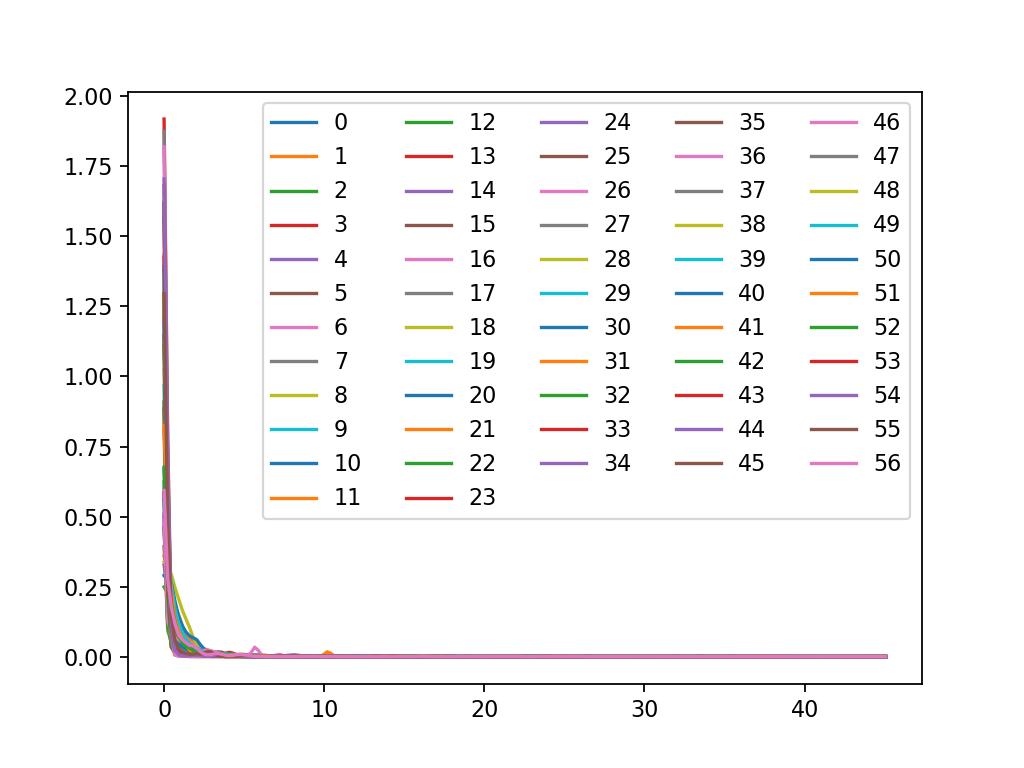

In [55]:
## Redo the Kernel Density Plot
nextplot()
densities = [scipy.stats.gaussian_kde(Xz[:, j]) for j in range(D)]
xs = np.linspace(0, np.max(Xz), 200)
for j in range(D):
    plt.plot(xs, densities[j](xs), label=j)
plt.legend(ncol=5)

<IPython.core.display.Javascript object>


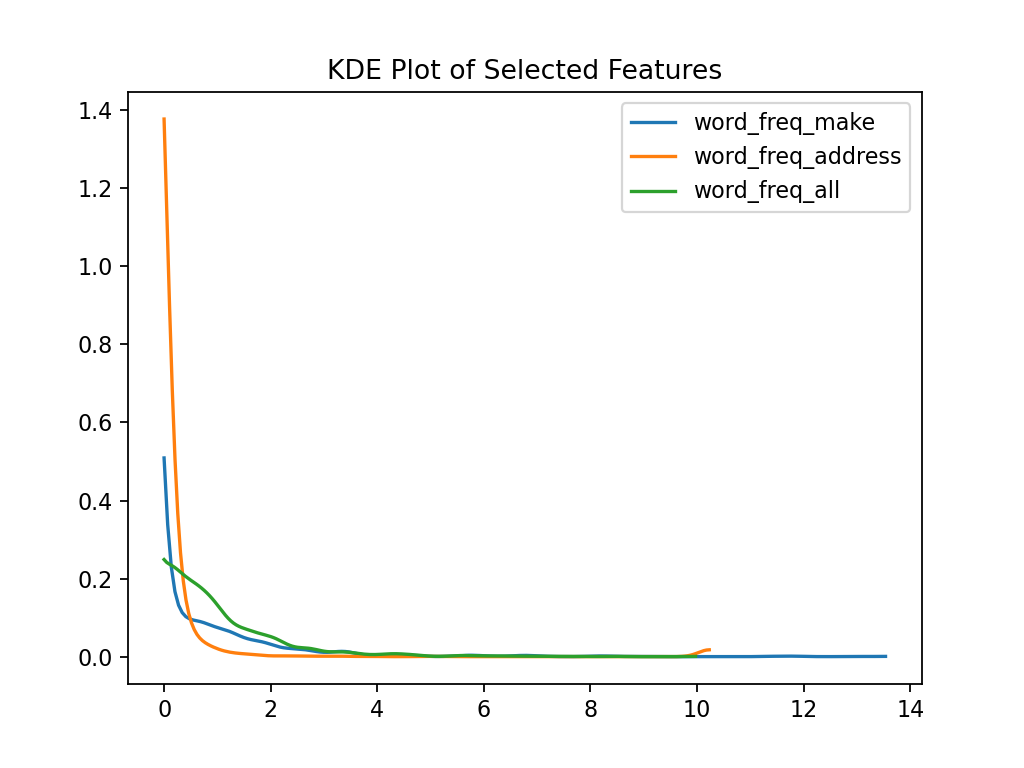

In [59]:
selected_features = [0, 1, 2]
plot_selected_features(Xz, features, selected_features)

# 2. Maximum Likelihood Estimation

## Helper functions

In [309]:
def logsumexp(x):
    """Computes log(sum(exp(x)).

    Uses offset trick to reduce risk of numeric over- or underflow. When x is a
    1D ndarray, computes logsumexp of its entries. When x is a 2D ndarray,
    computes logsumexp of each column.

    Keyword arguments:
    x : a 1D or 2D ndarray
    """
    offset = np.max(x, axis=0)
    return offset + np.log(np.sum(np.exp(x - offset), axis=0))

In [328]:
# Define the logistic function. Make sure it operates on both scalars
# and vectors.
def sigma(x):
    # YOUR CODE HERE
    return 1 / (1 + np.exp(-x))

In [329]:
# this should give:
# [0.5, array([0.26894142, 0.5, 0.73105858])]
[sigma(0), sigma(np.array([-1, 0, 1]))]

[0.5, array([0.26894142, 0.5       , 0.73105858])]

In [313]:
# Define the logarithm of the logistic function. Make sure it operates on both
# scalars and vectors. Perhaps helpful: isinstance(x, np.ndarray).
def logsigma(x):
    # YOUR CODE HERE
    # Check if x is a numpy array
    if isinstance(x, np.ndarray):
        return -np.log1p(np.exp(-x))
    else:
        return -np.log1p(np.exp(-x))

In [314]:
# this should give:
# [-0.69314718055994529, array([-1.31326169, -0.69314718, -0.31326169])]
[logsigma(0), logsigma(np.array([-1, 0, 1]))]

[-0.6931471805599453, array([-1.31326169, -0.69314718, -0.31326169])]

## 2b Log-likelihood and gradient

In [84]:
def l(y, X, w):
    """Log-likelihood of the logistic regression model.

    Parameters
    ----------
    y : ndarray of shape (N,)
        Binary labels (either 0 or 1).
    X : ndarray of shape (N,D)
        Design matrix.
    w : ndarray of shape (D,)
        Weight vector.
    """
    # YOUR CODE HERE
    z = X @ w
    log_likelihood = np.sum(y * logsigma(z) + (1 - y) * logsigma(-z))
    return log_likelihood

In [85]:
# this should give:
# -47066.641667825766
l(y, Xz, np.linspace(-5, 5, D))

-47066.641667825774

In [102]:
def dl(y, X, w):
    """Gradient of the log-likelihood of the logistic regression model.

    Parameters
    ----------
    y : ndarray of shape (N,)
        Binary labels (either 0 or 1).
    X : ndarray of shape (N,D)
        Design matrix.
    w : ndarray of shape (D,)
        Weight vector.

    Returns
    -------
    ndarray of shape (D,)
    """
    # YOUR CODE HERE
    gradient = X.T @ (y - sigma(X @ w))
    return gradient

In [103]:
# this should give:
# array([  551.33985842,   143.84116318,   841.83373606,   156.87237578,
#          802.61217579,   795.96202907,   920.69045803,   621.96516752,
#          659.18724769,   470.81259805,   771.32406968,   352.40325626,
#          455.66972482,   234.36600888,   562.45454038,   864.83981264,
#          787.19723703,   649.48042176,   902.6478154 ,   544.00539886,
#         1174.78638035,   120.3598967 ,   839.61141672,   633.30453444,
#         -706.66815087,  -630.2039816 ,  -569.3451386 ,  -527.50996698,
#         -359.53701083,  -476.64334832,  -411.60620464,  -375.11950586,
#         -345.37195689,  -376.22044258,  -407.31761977,  -456.23251936,
#         -596.86960184,  -107.97072355,  -394.82170044,  -229.18125598,
#         -288.46356547,  -362.13402385,  -450.87896465,  -277.03932676,
#         -414.99293368,  -452.28771693,  -167.54649092,  -270.9043748 ,
#         -252.20140951,  -357.72497343,  -259.12468742,   418.35938483,
#          604.54173228,    43.10390907,   152.24258478,   378.16731033,
#          416.12032881])
dl(y, Xz, np.linspace(-5, 5, D))

array([ 551.33985842,  143.84116318,  841.83373606,  156.87237578,
        802.61217579,  795.96202907,  920.69045803,  621.96516752,
        659.18724769,  470.81259805,  771.32406968,  352.40325626,
        455.66972482,  234.36600888,  562.45454038,  864.83981264,
        787.19723703,  649.48042176,  902.6478154 ,  544.00539886,
       1174.78638035,  120.3598967 ,  839.61141672,  633.30453444,
       -706.66815087, -630.2039816 , -569.3451386 , -527.50996698,
       -359.53701083, -476.64334832, -411.60620464, -375.11950586,
       -345.37195689, -376.22044258, -407.31761977, -456.23251936,
       -596.86960184, -107.97072355, -394.82170044, -229.18125598,
       -288.46356547, -362.13402385, -450.87896465, -277.03932676,
       -414.99293368, -452.28771693, -167.54649092, -270.9043748 ,
       -252.20140951, -357.72497343, -259.12468742,  418.35938483,
        604.54173228,   43.10390907,  152.24258478,  378.16731033,
        416.12032881])

## 2c Gradient descent

In [108]:
# you don't need to modify this function
def optimize(obj_up, theta0, nepochs=50, eps0=0.01, verbose=True):
    """Iteratively minimize a function.

    We use it here to run either gradient descent or stochastic gradient
    descent, using arbitrarly optimization criteria.

    Parameters
    ----------
    obj_up  : a tuple of form (f, update) containing two functions f and update.
              f(theta) computes the value of the objective function.
              update(theta,eps) performs an epoch of parameter update with step size
              eps and returns the result.
    theta0  : ndarray of shape (D,)
              Initial parameter vector.
    nepochs : int
              How many epochs (calls to update) to run.
    eps0    : float
              Initial step size.
    verbose : boolean
              Whether to print progress information.

    Returns
    -------
    A triple consisting of the fitted parameter vector, the values of the
    objective function after every epoch, and the step sizes that were used.
    """

    f, update = obj_up

    # initialize results
    theta = theta0
    values = np.zeros(nepochs + 1)
    eps = np.zeros(nepochs + 1)
    values[0] = f(theta0)
    eps[0] = eps0

    # now run the update function nepochs times
    for epoch in range(nepochs):
        if verbose:
            print(
                "Epoch {:3d}: f={:10.3f}, eps={:10.9f}".format(
                    epoch, values[epoch], eps[epoch]
                )
            )
        theta = update(theta, eps[epoch])

        # we use the bold driver heuristic
        values[epoch + 1] = f(theta)
        if values[epoch] < values[epoch + 1]:
            eps[epoch + 1] = eps[epoch] / 2.0
        else:
            eps[epoch + 1] = eps[epoch] * 1.05

    # all done
    if verbose:
        print("Result after {} epochs: f={}".format(nepochs, values[-1]))
    return theta, values, eps

In [109]:
# define the objective and update function for one gradient-descent epoch for
# fitting an MLE estimate of logistic regression with gradient descent (should
# return a tuple of two functions; see optimize)
def gd(y, X):
    def objective(w):
        # YOUR CODE HERE
        return -l(y, X, w)

    def update(w, eps):
        # YOUR CODE HERE
        grad = dl(y, X, w)
        return w + eps * grad

    return (objective, update)

In [110]:
# this should give
# [47066.641667825766,
#  array([  4.13777838e+01,  -1.56745627e+01,   5.75882538e+01,
#           1.14225143e+01,   5.54249703e+01,   5.99229049e+01,
#           7.11220141e+01,   4.84761728e+01,   5.78067289e+01,
#           4.54794720e+01,   7.14638492e+01,   1.51369386e+01,
#           3.36375739e+01,   2.15061217e+01,   5.78014255e+01,
#           6.72743066e+01,   7.00829312e+01,   5.29328088e+01,
#           6.16042473e+01,   5.50018510e+01,   8.94624817e+01,
#           2.74784480e+01,   8.51763599e+01,   5.60363965e+01,
#          -2.55865589e+01,  -1.53788213e+01,  -4.67015412e+01,
#          -2.50356570e+00,  -3.85357592e+00,  -2.21819155e+00,
#           3.32098671e+00,   3.86933390e+00,  -2.00309898e+01,
#           3.84684492e+00,  -2.19847927e-01,  -1.29775457e+00,
#          -1.28374302e+01,  -2.78303173e+00,  -5.61671182e+00,
#           1.73657121e+01,  -6.81197570e+00,  -1.20249002e+01,
#           2.65789491e+00,  -1.39557852e+01,  -2.01135653e+01,
#          -2.72134051e+01,  -9.45952961e-01,  -1.02239111e+01,
#           1.52794293e-04,  -5.18938123e-01,  -3.19717561e+00,
#           4.62953437e+01,   7.87893022e+01,   1.88618651e+01,
#           2.85195027e+01,   5.04698358e+01,   6.41240689e+01])
f, update = gd(y, Xz)
[f(np.linspace(-5, 5, D)), update(np.linspace(-5, -5, D), 0.1)]

[47066.641667825774,
 array([ 4.13777838e+01, -1.56745627e+01,  5.75882538e+01,  1.14225143e+01,
         5.54249703e+01,  5.99229049e+01,  7.11220141e+01,  4.84761728e+01,
         5.78067289e+01,  4.54794720e+01,  7.14638492e+01,  1.51369386e+01,
         3.36375739e+01,  2.15061217e+01,  5.78014255e+01,  6.72743066e+01,
         7.00829312e+01,  5.29328088e+01,  6.16042473e+01,  5.50018510e+01,
         8.94624817e+01,  2.74784480e+01,  8.51763599e+01,  5.60363965e+01,
        -2.55865589e+01, -1.53788213e+01, -4.67015412e+01, -2.50356570e+00,
        -3.85357592e+00, -2.21819155e+00,  3.32098671e+00,  3.86933390e+00,
        -2.00309898e+01,  3.84684492e+00, -2.19847927e-01, -1.29775457e+00,
        -1.28374302e+01, -2.78303173e+00, -5.61671182e+00,  1.73657121e+01,
        -6.81197570e+00, -1.20249002e+01,  2.65789491e+00, -1.39557852e+01,
        -2.01135653e+01, -2.72134051e+01, -9.45952961e-01, -1.02239111e+01,
         1.52794293e-04, -5.18938123e-01, -3.19717561e+00,  4.62953

In [111]:
# you can run gradient descent!
numpy.random.seed(0)
w0 = np.random.normal(size=D)
wz_gd, vz_gd, ez_gd = optimize(gd(y, Xz), w0, nepochs=500)

Epoch   0: f=  6636.208, eps=0.010000000
Epoch   1: f=  4216.957, eps=0.010500000
Epoch   2: f=  2657.519, eps=0.011025000
Epoch   3: f=  1926.135, eps=0.011576250
Epoch   4: f=  1449.495, eps=0.012155063
Epoch   5: f=  1207.529, eps=0.012762816
Epoch   6: f=  1052.489, eps=0.013400956
Epoch   7: f=   957.275, eps=0.014071004
Epoch   8: f=   899.610, eps=0.014774554
Epoch   9: f=   882.904, eps=0.015513282
Epoch  10: f=  1017.083, eps=0.007756641
Epoch  11: f=   840.760, eps=0.008144473
Epoch  12: f=   805.649, eps=0.008551697
Epoch  13: f=   822.108, eps=0.004275848
Epoch  14: f=   746.377, eps=0.004489641
Epoch  15: f=   735.803, eps=0.004714123
Epoch  16: f=   729.780, eps=0.004949829
Epoch  17: f=   724.467, eps=0.005197320
Epoch  18: f=   719.408, eps=0.005457186
Epoch  19: f=   714.564, eps=0.005730046
Epoch  20: f=   709.932, eps=0.006016548
Epoch  21: f=   705.514, eps=0.006317375
Epoch  22: f=   701.321, eps=0.006633244
Epoch  23: f=   697.373, eps=0.006964906
Epoch  24: f=   

<IPython.core.display.Javascript object>


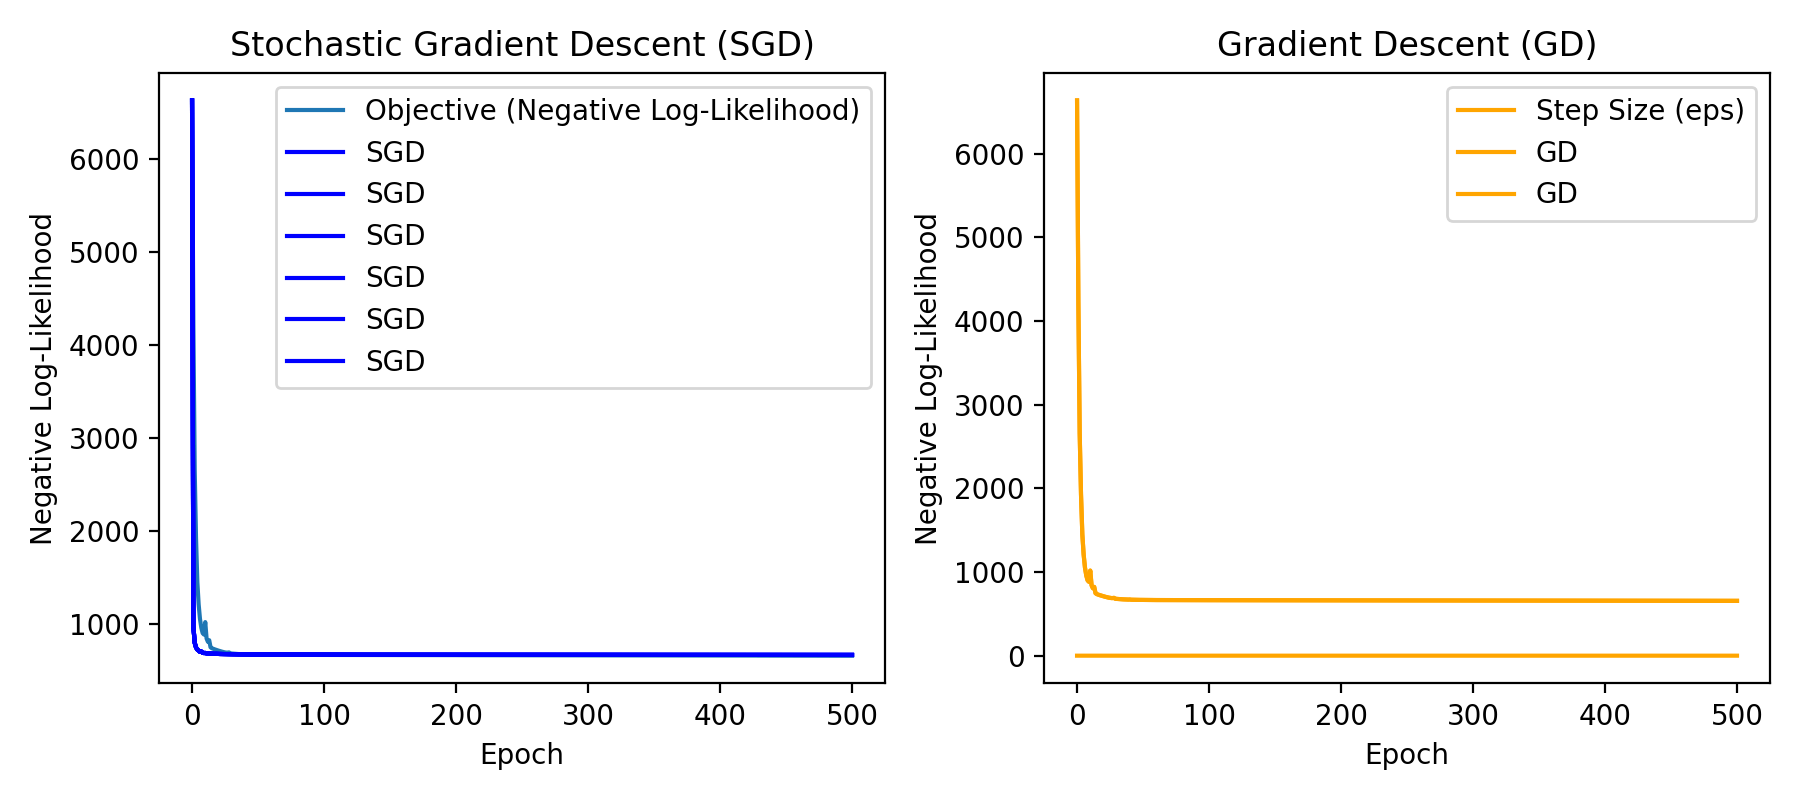

In [123]:
# look at how gradient descent made progess
# YOUR CODE HERE
# Plot the progression of the objective function value (negative log-likelihood)
plt.figure(figsize=(9, 4))

plt.subplot(1, 2, 1)
plt.plot(vz_gd, label="Objective (Negative Log-Likelihood)")
plt.xlabel("Epoch")
plt.ylabel("Objective Function Value")
plt.title("Progression of Objective Function")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(ez_gd, label="Step Size (eps)", color="orange")
plt.xlabel("Epoch")
plt.ylabel("Step Size")
plt.title("Progression of Step Size")
plt.legend()

plt.tight_layout()
plt.show()

## 2d Stochastic gradient descent

In [136]:
def sgdepoch(y, X, w, eps):
    """Run one SGD epoch and return the updated weight vector. """
    # Run N stochastic gradient steps (without replacement). Do not rescale each
    # step by factor N (i.e., proceed differently than in the lecture slides).
    # YOUR CODE HERE
    indices = np.random.permutation(len(y))
    
    for i in indices:
        xi = X[i]
        yi = y[i]
        
        gradient = (yi - sigma(xi @ w)) * xi
        w += eps * gradient

    return w

In [137]:
# when you run this multiple times, with 50% probability you should get the
# following result (there is one other result which is very close):
# array([ -3.43689655e+02,  -1.71161311e+02,  -5.71093536e+02,
#         -5.16478220e+01,   4.66294348e+02,  -3.71589878e+02,
#          5.21493183e+02,   1.25699230e+03,   8.33804130e+02,
#          5.63185399e+02,   1.32761302e+03,  -2.64104011e+02,
#          7.10693307e+02,  -1.75497331e+02,  -1.94174427e+02,
#          1.11641507e+02,  -3.30817509e+02,  -3.46754913e+02,
#          8.48722111e+02,  -1.89136304e+02,  -4.25693844e+02,
#         -1.23084189e+02,  -2.95894797e+02,  -2.35789333e+02,
#         -3.38695243e+02,  -3.05642830e+02,  -2.28975383e+02,
#         -2.38075137e+02,  -1.66702530e+02,  -2.27341599e+02,
#         -1.77575620e+02,  -1.49093855e+02,  -1.70028859e+02,
#         -1.50243833e+02,  -1.82986008e+02,  -2.41143708e+02,
#         -3.31047159e+02,  -5.79991185e+01,  -1.98477863e+02,
#         -1.91264948e+02,  -1.17371919e+02,  -1.66953779e+02,
#         -2.01472565e+02,  -1.23330949e+02,  -3.00857740e+02,
#         -1.95853348e+02,  -7.44868073e+01,  -1.11172370e+02,
#         -1.57618226e+02,  -1.25729512e+00,  -1.45536466e+02,
#         -1.43362438e+02,  -3.00429708e+02,  -9.84391082e+01,
#         -4.54152047e+01,  -5.26492232e+01,  -1.45175427e+02])
sgdepoch(y[1:3], Xz[1:3, :], np.linspace(-5, 5, D), 1000)

array([-343.68965468, -171.16131088, -571.0935363 ,  -51.64782199,
        466.29434839, -371.58987765,  521.49318326, 1256.99229669,
        833.80413052,  563.18539912, 1327.6130216 , -264.10401085,
        710.69330696, -175.49733124, -194.17442685,  111.6415075 ,
       -330.81750896, -346.75491303,  848.72211134, -189.13630403,
       -425.69384414, -123.08418879, -295.89479699, -235.78933296,
       -338.69524324, -305.64283021, -228.97538337, -238.07513719,
       -166.70252969, -227.34159943, -177.57562021, -149.09385494,
       -170.02885884, -150.24383253, -182.98600816, -241.14370766,
       -331.0471594 ,  -57.99911848, -198.47786321, -191.26494851,
       -117.37191884, -166.95377868, -201.47256486, -123.33094893,
       -300.85774034, -195.8533476 ,  -74.48680731, -111.17237043,
       -157.61822569,   -8.42895846, -145.53646559, -145.65820563,
       -300.42970793,  -98.43910824,  -45.41520475,  -52.64922325,
       -145.17542713])

In [138]:
# define the objective and update function for one gradient-descent epoch for
# fitting an MLE estimate of logistic regression with stochastic gradient descent
# (should return a tuple of two functions; see optimize)
def sgd(y, X):
    def objective(w):
        # YOUR CODE HERE
        return -l(y, X, w)
        
    def update(w, eps):
        return sgdepoch(y, X, w, eps)

    return (objective, update)

In [139]:
# with 50% probability, you should get:
# [40.864973045695081,
#  array([ -3.43689655e+02,  -1.71161311e+02,  -5.71093536e+02,
#          -5.16478220e+01,   4.66294348e+02,  -3.71589878e+02,
#           5.21493183e+02,   1.25699230e+03,   8.33804130e+02,
#           5.63185399e+02,   1.32761302e+03,  -2.64104011e+02,
#           7.10693307e+02,  -1.75497331e+02,  -1.94174427e+02,
#           1.11641507e+02,  -3.30817509e+02,  -3.46754913e+02,
#           8.48722111e+02,  -1.89136304e+02,  -4.25693844e+02,
#          -1.23084189e+02,  -2.95894797e+02,  -2.35789333e+02,
#          -3.38695243e+02,  -3.05642830e+02,  -2.28975383e+02,
#          -2.38075137e+02,  -1.66702530e+02,  -2.27341599e+02,
#          -1.77575620e+02,  -1.49093855e+02,  -1.70028859e+02,
#          -1.50243833e+02,  -1.82986008e+02,  -2.41143708e+02,
#          -3.31047159e+02,  -5.79991185e+01,  -1.98477863e+02,
#          -1.91264948e+02,  -1.17371919e+02,  -1.66953779e+02,
#          -2.01472565e+02,  -1.23330949e+02,  -3.00857740e+02,
#          -1.95853348e+02,  -7.44868073e+01,  -1.11172370e+02,
#          -1.57618226e+02,  -1.25729512e+00,  -1.45536466e+02,
#          -1.43362438e+02,  -3.00429708e+02,  -9.84391082e+01,
#          -4.54152047e+01,  -5.26492232e+01,  -1.45175427e+02])]
f, update = sgd(y[1:3], Xz[1:3, :])
[f(np.linspace(-5, 5, D)), update(np.linspace(-5, 5, D), 1000)]

[40.86497304569509,
 array([-3.43689655e+02, -1.71161311e+02, -5.71093536e+02, -5.16478220e+01,
         4.66294348e+02, -3.71589878e+02,  5.21493183e+02,  1.25699230e+03,
         8.33804130e+02,  5.63185399e+02,  1.32761302e+03, -2.64104011e+02,
         7.10693307e+02, -1.75497331e+02, -1.94174427e+02,  1.11641507e+02,
        -3.30817509e+02, -3.46754913e+02,  8.48722111e+02, -1.89136304e+02,
        -4.25693844e+02, -1.23084189e+02, -2.95894797e+02, -2.35789333e+02,
        -3.38695243e+02, -3.05642830e+02, -2.28975383e+02, -2.38075137e+02,
        -1.66702530e+02, -2.27341599e+02, -1.77575620e+02, -1.49093855e+02,
        -1.70028859e+02, -1.50243833e+02, -1.82986008e+02, -2.41143708e+02,
        -3.31047159e+02, -5.79991185e+01, -1.98477863e+02, -1.91264948e+02,
        -1.17371919e+02, -1.66953779e+02, -2.01472565e+02, -1.23330949e+02,
        -3.00857740e+02, -1.95853348e+02, -7.44868073e+01, -1.11172370e+02,
        -1.57618226e+02, -1.25729512e+00, -1.45536466e+02, -1.433624

In [140]:
# you can run stochastic gradient descent!
wz_sgd, vz_sgd, ez_sgd = optimize(sgd(y, Xz), w0, nepochs=500)

Epoch   0: f=  6636.208, eps=0.010000000
Epoch   1: f=   971.379, eps=0.010500000
Epoch   2: f=   794.794, eps=0.011025000
Epoch   3: f=   744.176, eps=0.011576250
Epoch   4: f=   720.713, eps=0.012155063
Epoch   5: f=   710.576, eps=0.012762816
Epoch   6: f=   696.426, eps=0.013400956
Epoch   7: f=   701.076, eps=0.006700478
Epoch   8: f=   686.690, eps=0.007035502
Epoch   9: f=   683.915, eps=0.007387277
Epoch  10: f=   684.682, eps=0.003693639
Epoch  11: f=   680.112, eps=0.003878321
Epoch  12: f=   679.357, eps=0.004072237
Epoch  13: f=   678.290, eps=0.004275848
Epoch  14: f=   677.666, eps=0.004489641
Epoch  15: f=   676.842, eps=0.004714123
Epoch  16: f=   676.032, eps=0.004949829
Epoch  17: f=   676.677, eps=0.002474914
Epoch  18: f=   675.233, eps=0.002598660
Epoch  19: f=   674.573, eps=0.002728593
Epoch  20: f=   674.133, eps=0.002865023
Epoch  21: f=   673.726, eps=0.003008274
Epoch  22: f=   673.388, eps=0.003158688
Epoch  23: f=   673.099, eps=0.003316622
Epoch  24: f=   

Epoch 211: f=   664.863, eps=0.000984496
Epoch 212: f=   664.856, eps=0.001033721
Epoch 213: f=   664.847, eps=0.001085407
Epoch 214: f=   664.842, eps=0.001139678
Epoch 215: f=   664.840, eps=0.001196661
Epoch 216: f=   664.823, eps=0.001256494
Epoch 217: f=   664.812, eps=0.001319319
Epoch 218: f=   664.828, eps=0.000659660
Epoch 219: f=   664.812, eps=0.000692643
Epoch 220: f=   664.796, eps=0.000727275
Epoch 221: f=   664.785, eps=0.000763638
Epoch 222: f=   664.779, eps=0.000801820
Epoch 223: f=   664.768, eps=0.000841911
Epoch 224: f=   664.763, eps=0.000884007
Epoch 225: f=   664.756, eps=0.000928207
Epoch 226: f=   664.746, eps=0.000974618
Epoch 227: f=   664.740, eps=0.001023349
Epoch 228: f=   664.729, eps=0.001074516
Epoch 229: f=   664.721, eps=0.001128242
Epoch 230: f=   664.713, eps=0.001184654
Epoch 231: f=   664.707, eps=0.001243887
Epoch 232: f=   664.705, eps=0.001306081
Epoch 233: f=   664.684, eps=0.001371385
Epoch 234: f=   664.690, eps=0.000685692
Epoch 235: f=   

Epoch 413: f=   663.682, eps=0.000578605
Epoch 414: f=   663.679, eps=0.000607536
Epoch 415: f=   663.674, eps=0.000637912
Epoch 416: f=   663.671, eps=0.000669808
Epoch 417: f=   663.665, eps=0.000703298
Epoch 418: f=   663.662, eps=0.000738463
Epoch 419: f=   663.656, eps=0.000775386
Epoch 420: f=   663.652, eps=0.000814156
Epoch 421: f=   663.647, eps=0.000854863
Epoch 422: f=   663.641, eps=0.000897607
Epoch 423: f=   663.636, eps=0.000942487
Epoch 424: f=   663.630, eps=0.000989611
Epoch 425: f=   663.628, eps=0.001039092
Epoch 426: f=   663.628, eps=0.000519546
Epoch 427: f=   663.622, eps=0.000545523
Epoch 428: f=   663.617, eps=0.000572799
Epoch 429: f=   663.611, eps=0.000601439
Epoch 430: f=   663.607, eps=0.000631511
Epoch 431: f=   663.603, eps=0.000663087
Epoch 432: f=   663.600, eps=0.000696241
Epoch 433: f=   663.596, eps=0.000731053
Epoch 434: f=   663.594, eps=0.000767606
Epoch 435: f=   663.588, eps=0.000805986
Epoch 436: f=   663.583, eps=0.000846286
Epoch 437: f=   

## 2e Compare GD and SGD

<IPython.core.display.Javascript object>


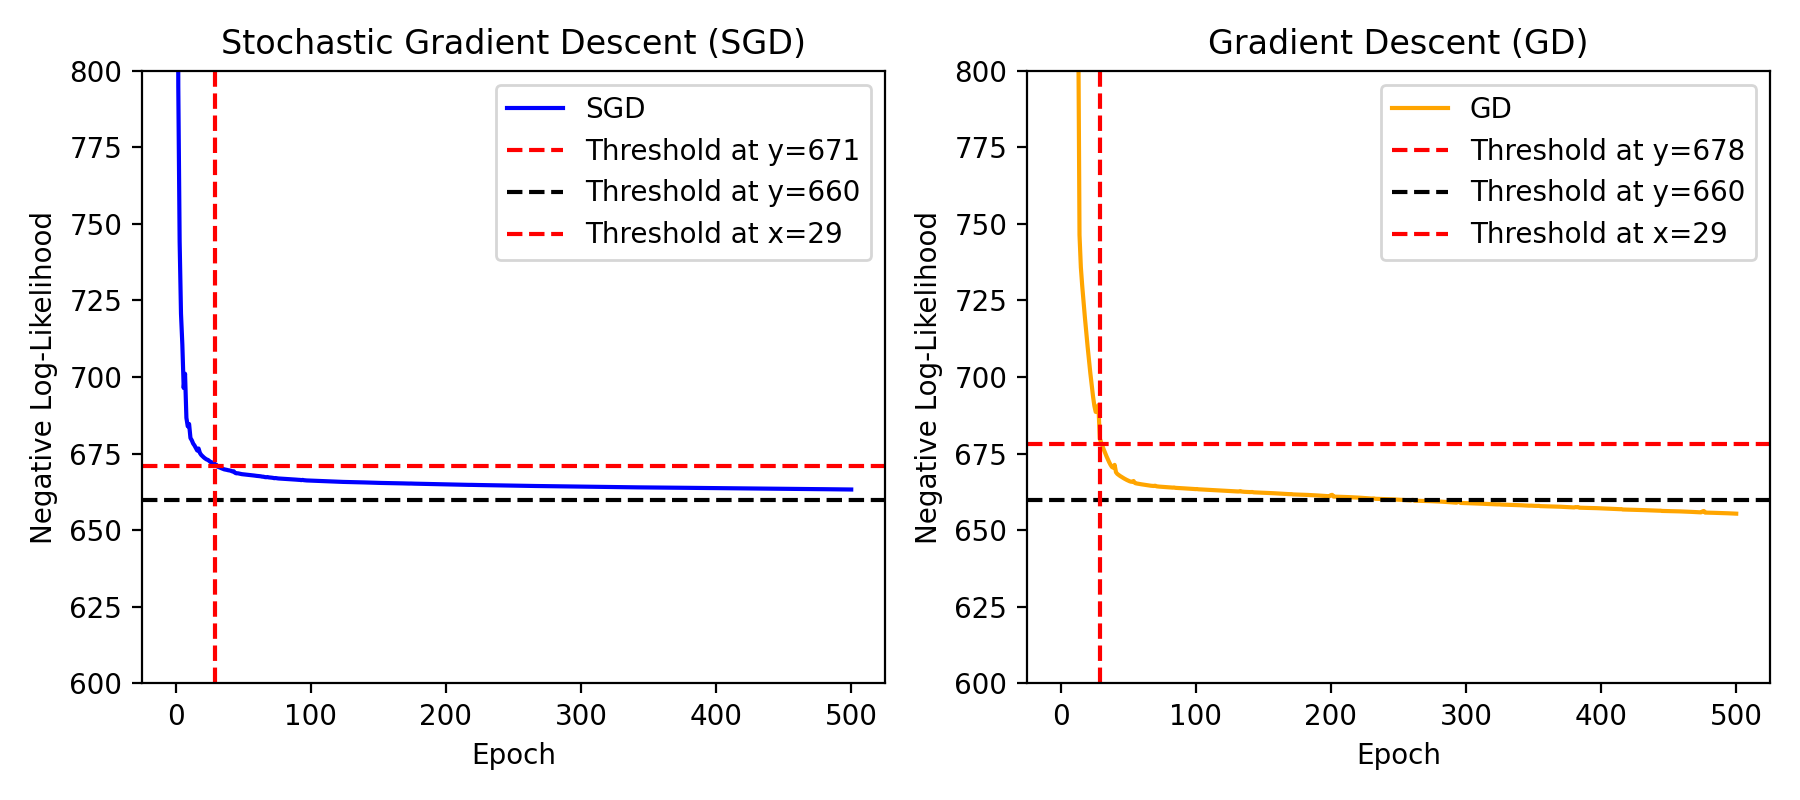

In [207]:
# YOUR CODE HERE
np.random.seed(0)

plt.figure(figsize=(9, 4))

plt.subplot(1, 2, 1)
plt.plot(vz_sgd, label='SGD', color='blue')
plt.title('Stochastic Gradient Descent (SGD)')
plt.xlabel('Epoch')
plt.ylabel('Negative Log-Likelihood')
plt.ylim(600, 800)
plt.axhline(y=671, color='red', linestyle='--', label='Threshold at y=671')
plt.axhline(y=660, color='black', linestyle='--', label='Threshold at y=660')
plt.axvline(x=29, color='red', linestyle='--', label='Threshold at x=29')
plt.legend()

# Plot GD results
plt.subplot(1, 2, 2)
plt.plot(vz_gd, label='GD', color='orange')
plt.title('Gradient Descent (GD)')
plt.xlabel('Epoch')
plt.ylabel('Negative Log-Likelihood')
plt.ylim(600, 800)
plt.axhline(y=678, color='red', linestyle='--', label='Threshold at y=678')
plt.axhline(y=660, color='black', linestyle='--', label='Threshold at y=660')
plt.axvline(x=29, color='red', linestyle='--', label='Threshold at x=29')
plt.legend()

plt.tight_layout()
plt.show()

In [226]:
print('1) SVD min loglikelihood: ', np.min(vz_sgd), '\n2) GD min loglikelihood : ' , np.min(vz_gd))
print('****************************************')
print('1) SVD mean loglikelihood: ', np.mean(vz_sgd), '\n2) GD mean loglikelihood : ' , np.mean(vz_gd))
print('****************************************')
print('1) SVD median loglikelihood: ', np.median(vz_sgd), '\n2) GD median loglikelihood : ' , np.median(vz_gd))
print('****************************************')
print('1) SVD 1st quartile loglikelihood: ', np.percentile(vz_sgd, 25), '\n2) GD 1st quartile loglikelihood : ' , np.percentile(vz_gd, 25))
print('****************************************')
print('1) SVD 3rd quartile loglikelihood: ', np.percentile(vz_sgd, 75), '\n2) GD 3rd quartile loglikelihood : ' , np.percentile(vz_gd, 75))

1) SVD min loglikelihood:  663.2973296789817 
2) GD min loglikelihood :  655.413496469943
****************************************
1) SVD mean loglikelihood:  678.6860501900633 
2) GD mean loglikelihood :  693.8859677697319
****************************************
1) SVD median loglikelihood:  664.5785738153414 
2) GD median loglikelihood :  659.9852259808722
****************************************
1) SVD 1st quartile loglikelihood:  663.8652951280337 
2) GD 1st quartile loglikelihood :  657.5670859999374
****************************************
1) SVD 3rd quartile loglikelihood:  665.7772999208883 
2) GD 3rd quartile loglikelihood :  662.8279655964287


Performance Comparison: GD shows an ability to achieve better minimum and median log-likelihoods, suggesting it can consistently find better solutions than SVD. However, the higher mean log-likelihood indicates that it may be less stable and potentially overshooting optimal solutions in some cases.

Consistency and Variability: The results indicate that while SGD can yield superior results in many instances (especially seen in the lower quartiles), it may also lead to worse overall average results. The higher mean log-likelihood of GD suggests it might struggle with consistency across epochs.

Convergence Behavior: The ability of GD to reach lower minimum log-likelihoods indicates effective convergence properties in some scenarios, but the overall higher mean log-likelihood signifies potential issues with oscillations or failures to converge adequately during other epochs.

Conclusion: In summary, while GD can find better solutions in specific instances, its average performance suggests that it may require tuning of hyperparameters (like learning rate and epoch count) for more consistent results. Conversely, SVD might provide more stable outcomes but may not reach the same depths of performance as GD. Therefore, it could be beneficial to consider combining the strengths of both methods or fine-tuning GD for better average performance.

for mean: 
Discussion: Interestingly, while the minimum log-likelihood favors GD, the mean log-likelihood is worse for GD. This indicates that while GD can find a better solution in some cases (as seen with the minimum), its overall performance across all epochs is less effective than SVD. This could suggest that GD might be more prone to instability or has larger fluctuations in performance across epochs.

median:
The median log-likelihood for GD is lower than for SVD, which points to better central performance for GD. This means that in the majority of the epochs, GD is finding better-fitting models compared to SVD.

# 3 Prediction

In [244]:
def predict(Xtest, w):
    """Returns vector of predicted confidence values for logistic regression with
weight vector w."""
    # YOUR CODE HERE
    return sigma(Xtest @ w)

def classify(Xtest, w):
    """Returns 0/1 vector of predicted class labels for logistic regression with
weight vector w."""
    # YOUR CODE HERE
    return np.where(predict(Xtest, w) > 0.5, 1, 0)

In [253]:
yhat_sgd = predict(Xtestz, wz_sgd)
ypred_sgd = classify(Xtestz, wz_sgd)
print(sklearn.metrics.confusion_matrix(ytest, ypred_sgd))  # true x predicted

[[886  55]
 [ 72 523]]


In [254]:
# Example: confusion matrix
yhat = predict(Xtestz, wz_gd)
ypred = classify(Xtestz, wz_gd)
print(sklearn.metrics.confusion_matrix(ytest, ypred))  # true x predicted

[[887  54]
 [ 71 524]]


In [255]:
# Example: classification report
print(sklearn.metrics.classification_report(ytest, ypred))
print('************************************')
print('SGD: ')
print(sklearn.metrics.classification_report(ytest, ypred_sgd))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       941
           1       0.91      0.88      0.89       595

    accuracy                           0.92      1536
   macro avg       0.92      0.91      0.91      1536
weighted avg       0.92      0.92      0.92      1536

************************************
SGD: 
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       941
           1       0.90      0.88      0.89       595

    accuracy                           0.92      1536
   macro avg       0.91      0.91      0.91      1536
weighted avg       0.92      0.92      0.92      1536



<IPython.core.display.Javascript object>


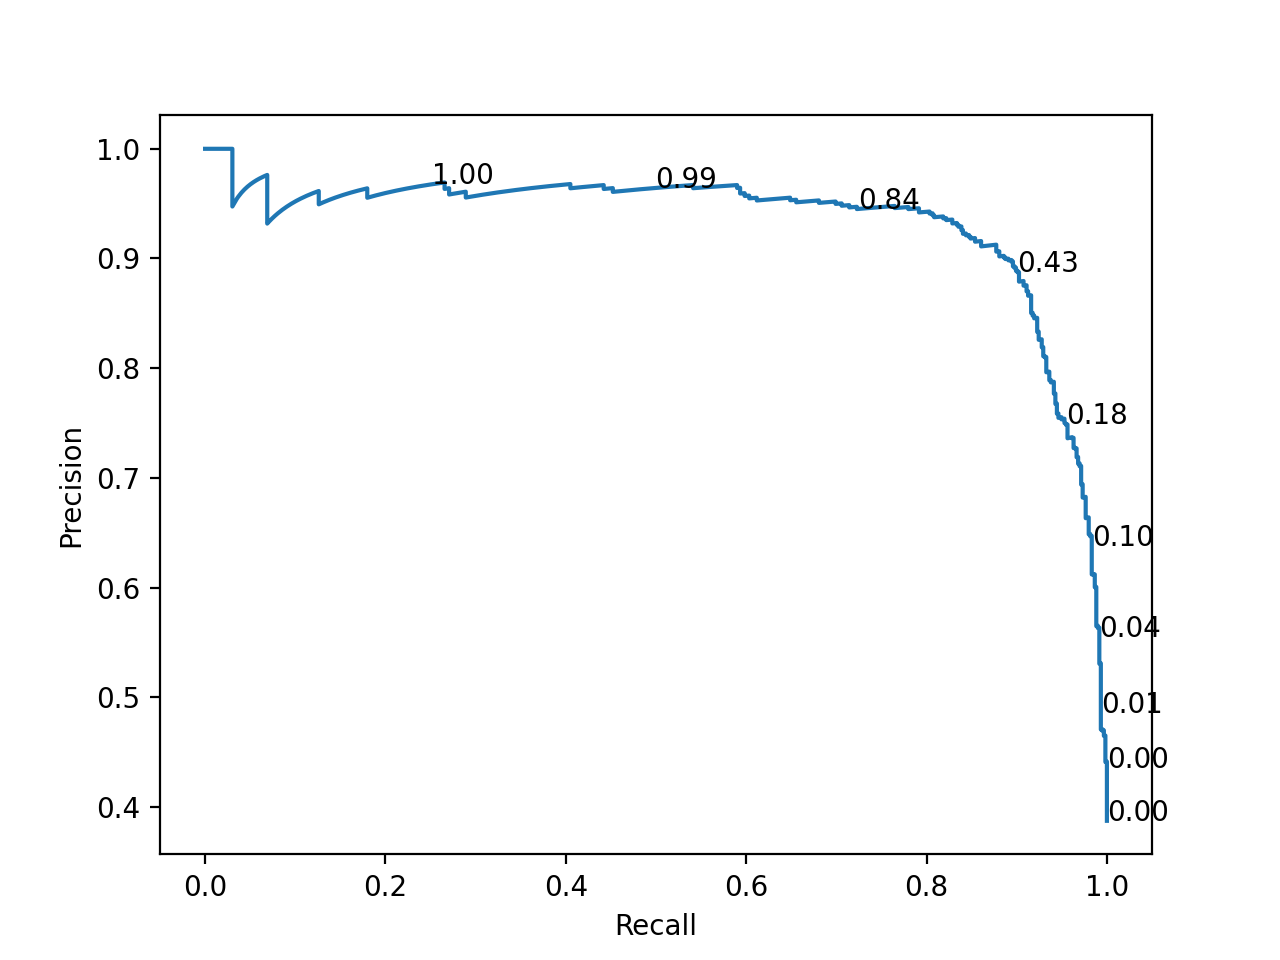

Text(0, 0.5, 'Precision')

In [248]:
# Example: precision-recall curve (with annotated thresholds)
nextplot()
precision, recall, thresholds = sklearn.metrics.precision_recall_curve(ytest, yhat)
plt.plot(recall, precision)
for x in np.linspace(0, 1, 10, endpoint=False):
    index = int(x * (precision.size - 1))
    plt.text(recall[index], precision[index], "{:3.2f}".format(thresholds[index]))
plt.xlabel("Recall")
plt.ylabel("Precision")

Exploring the Models
After implementing the prediction and classification functions, you can evaluate the fitted models. Here are a few points to consider for discussion:

Model Evaluation:

Assess the predicted probabilities and class labels against a validation or test dataset. Use metrics like accuracy, precision, recall, and F1-score to evaluate the model's performance.
Feature Importance:

Investigate the weight vector w to understand which features contribute positively or negatively to the spam prediction. Features with larger absolute weight values have a more significant impact on the predictions.
You can visualize the weights using a bar chart or heatmap to get an intuitive understanding of feature importance.
Intuition Behind Features:

Consider whether the most important features align with your expectations. For example, if certain words or phrases (like "free" or "offer") have high positive weights, this may align with common spam characteristics. Conversely, if other features expected to indicate spam show low importance, this may prompt further investigation.
Final Thoughts:

Reflect on how the results of your model relate to the nature of spam detection. Discuss how the identified features support or contradict established knowledge about spam emails.


<IPython.core.display.Javascript object>


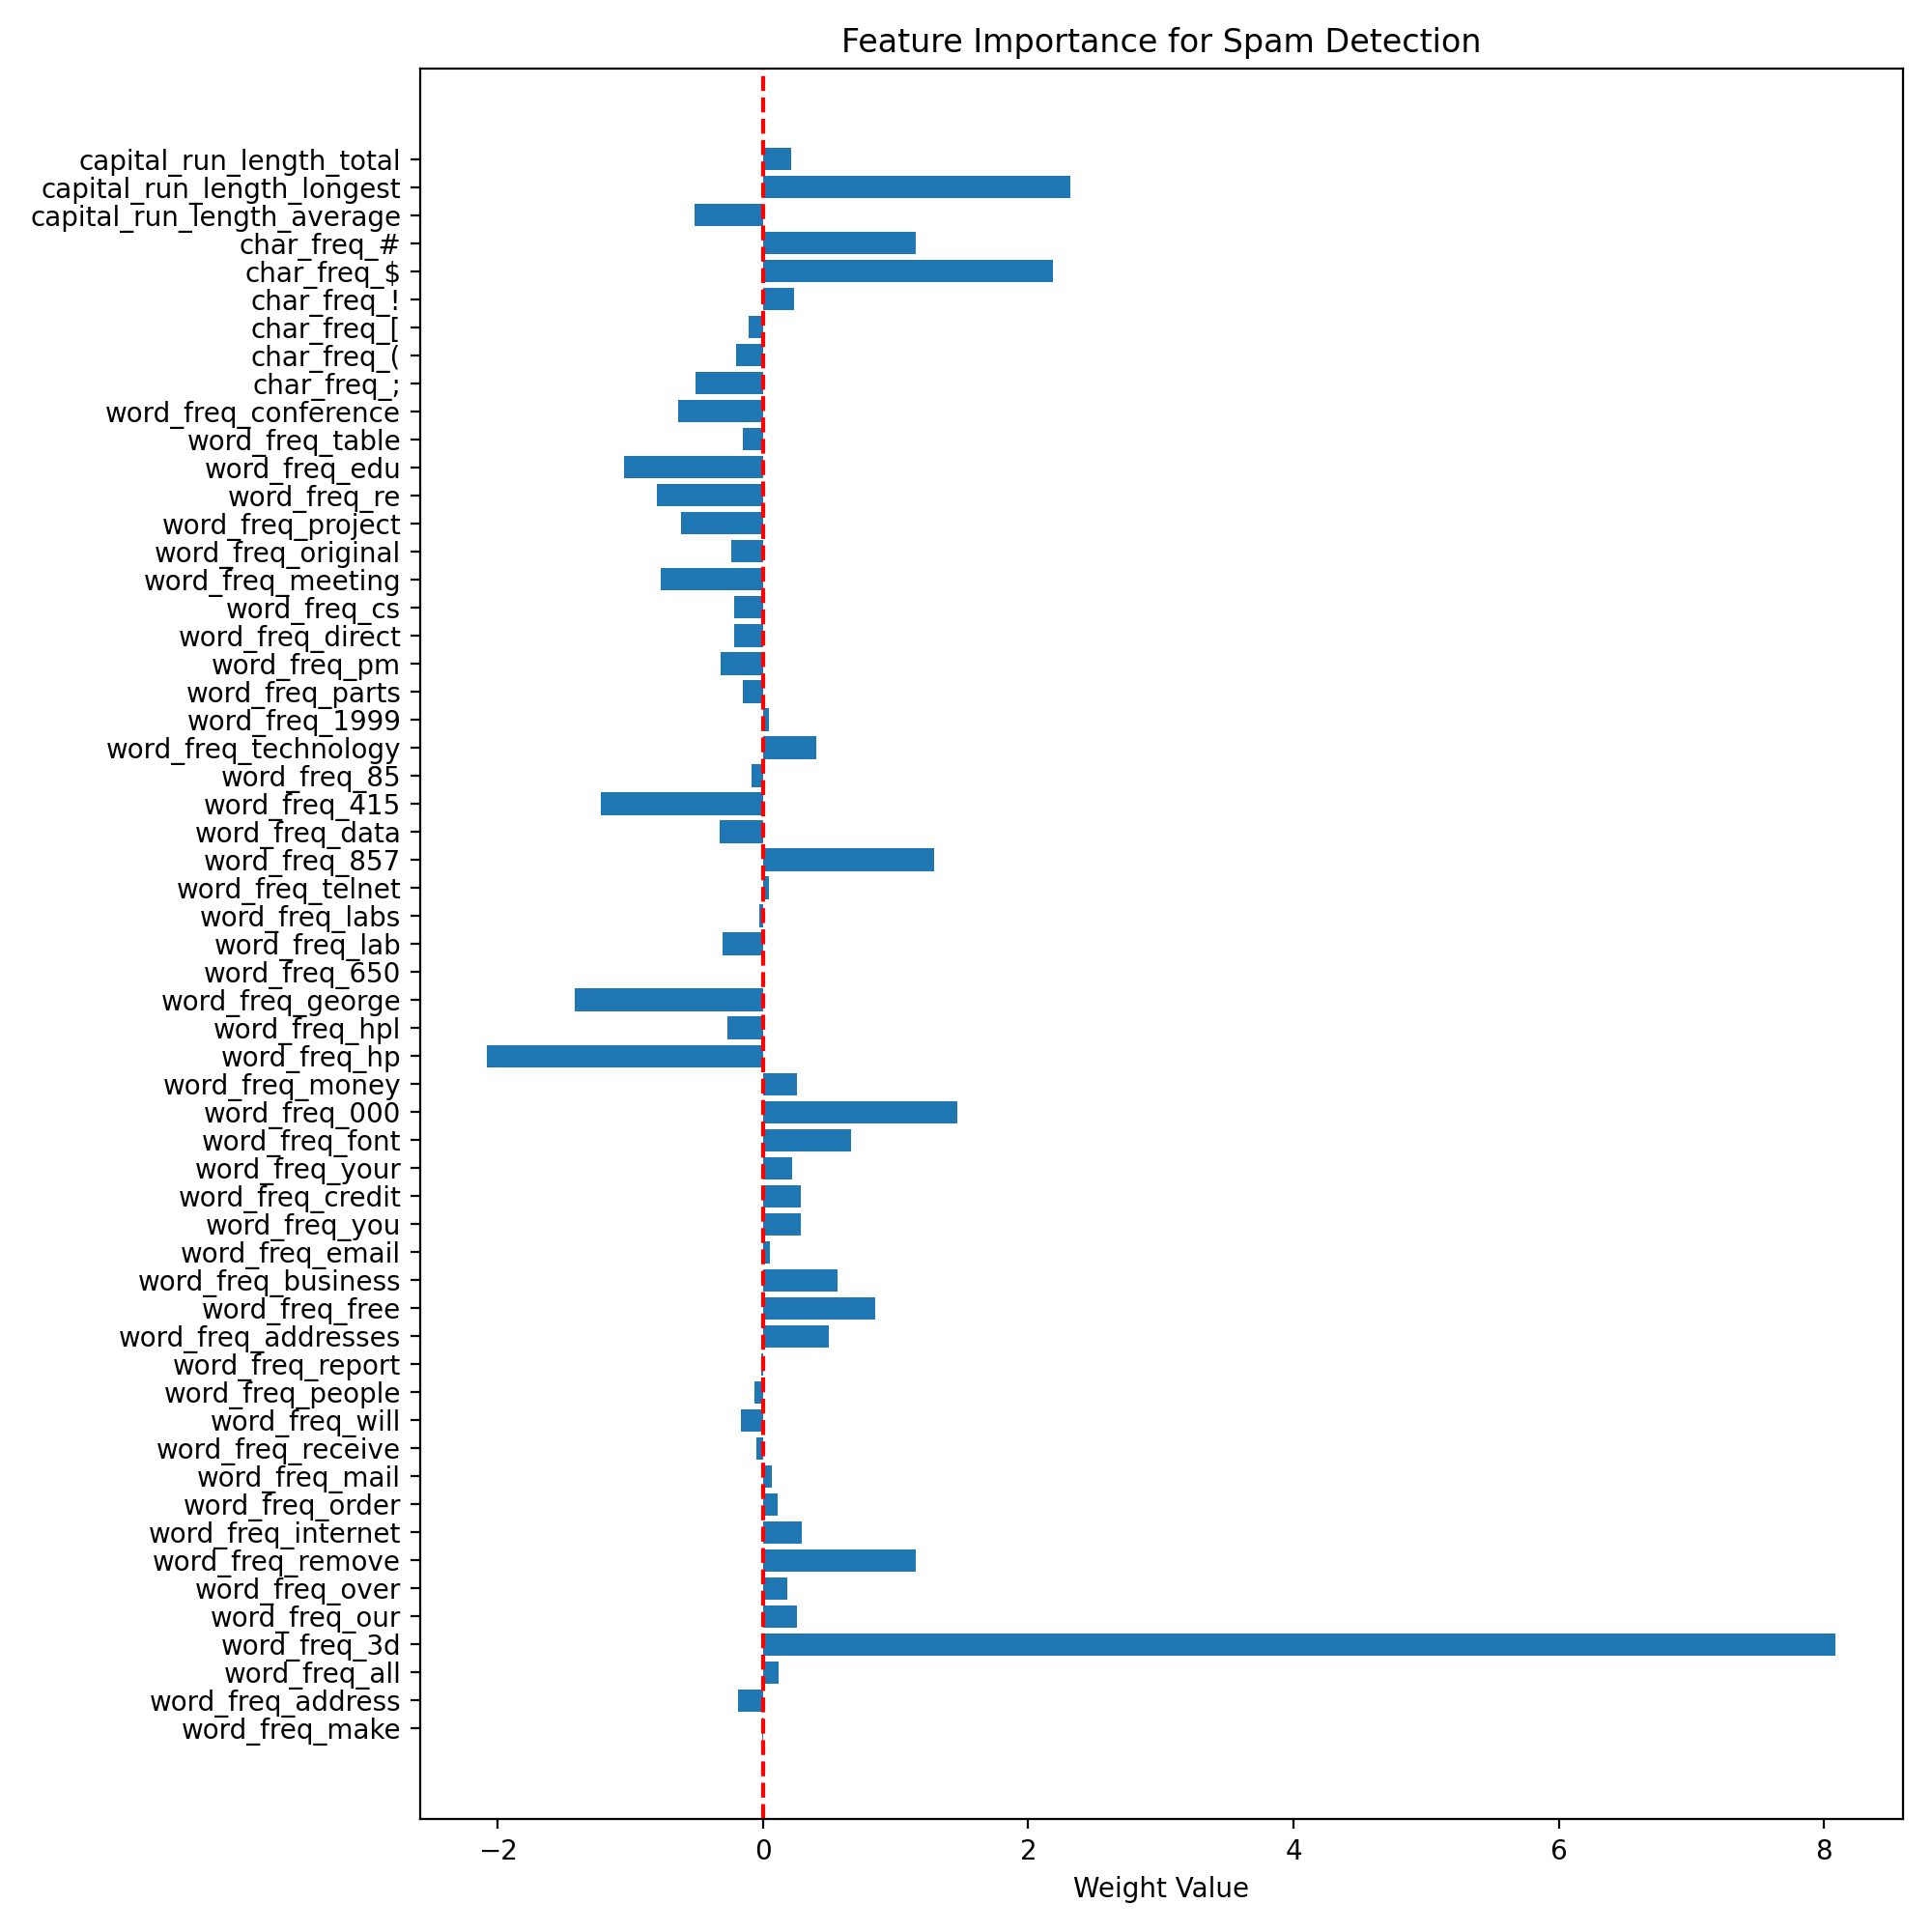

In [252]:
# Explore which features are considered important
# YOUR CODE HERE
def plot_feature_importance(w, feature_names):
    plt.figure(figsize=(10, 10))
    plt.barh(feature_names, w)
    plt.xlabel('Weight Value')
    plt.title('Feature Importance for Spam Detection')
    plt.axvline(0, color='red', linestyle='--')
    plt.tight_layout()
    plt.show()

plot_feature_importance(wz_gd, features)

# 4 Maximum Aposteriori Estimation

## 4a Gradient Descent

In [256]:
def l_l2(y, X, w, lambda_):
    """Log-density of posterior of logistic regression with weights w and L2
regularization parameter lambda_"""
    # YOUR CODE HERE
    log_likelihood = l(y, X, w)
    log_prior = -0.5 * lambda_ * np.sum(w ** 2)
    return log_likelihood + log_prior

In [257]:
# this should give:
# [-47066.641667825766, -47312.623810682911]
[l_l2(y, Xz, np.linspace(-5, 5, D), 0), l_l2(y, Xz, np.linspace(-5, 5, D), 1)]

[-47066.641667825774, -47312.62381068292]

In [258]:
def dl_l2(y, X, w, lambda_):
    """Gradient of log-density of posterior of logistic regression with weights w
and L2 regularization parameter lambda_."""
    # YOUR CODE HERE
    gradient_likelihood = dl(y, X, w)
    gradient_prior = -lambda_ * w  # Derivative of the Gaussian prior
    return gradient_likelihood + gradient_prior

In [259]:
# this should give:
# [array([  551.33985842,   143.84116318,   841.83373606,   156.87237578,
#           802.61217579,   795.96202907,   920.69045803,   621.96516752,
#           659.18724769,   470.81259805,   771.32406968,   352.40325626,
#           455.66972482,   234.36600888,   562.45454038,   864.83981264,
#           787.19723703,   649.48042176,   902.6478154 ,   544.00539886,
#          1174.78638035,   120.3598967 ,   839.61141672,   633.30453444,
#          -706.66815087,  -630.2039816 ,  -569.3451386 ,  -527.50996698,
#          -359.53701083,  -476.64334832,  -411.60620464,  -375.11950586,
#          -345.37195689,  -376.22044258,  -407.31761977,  -456.23251936,
#          -596.86960184,  -107.97072355,  -394.82170044,  -229.18125598,
#          -288.46356547,  -362.13402385,  -450.87896465,  -277.03932676,
#          -414.99293368,  -452.28771693,  -167.54649092,  -270.9043748 ,
#          -252.20140951,  -357.72497343,  -259.12468742,   418.35938483,
#           604.54173228,    43.10390907,   152.24258478,   378.16731033,
#           416.12032881]),
#  array([  556.33985842,   148.66259175,   846.4765932 ,   161.33666149,
#           806.89789007,   800.06917193,   924.61902946,   625.71516752,
#           662.75867626,   474.20545519,   774.5383554 ,   355.43897054,
#           458.52686767,   237.04458031,   564.95454038,   867.16124121,
#           789.34009417,   651.44470748,   904.43352968,   545.61254171,
#          1176.21495178,   121.6098967 ,   840.68284529,   634.19739158,
#          -705.95386516,  -629.66826731,  -568.98799574,  -527.33139555,
#          -359.53701083,  -476.82191975,  -411.9633475 ,  -375.65522015,
#          -346.08624261,  -377.11329972,  -408.38904835,  -457.48251936,
#          -598.29817327,  -109.57786641,  -396.60741472,  -231.14554169,
#          -290.60642261,  -364.45545242,  -453.37896465,  -279.71789819,
#          -417.85007654,  -455.32343122,  -170.76077664,  -274.29723194,
#          -255.77283808,  -361.47497343,  -263.05325885,   414.25224198,
#           600.25601799,    38.63962335,   147.59972763,   373.34588176,
#           411.12032881])]
[dl_l2(y, Xz, np.linspace(-5, 5, D), 0), dl_l2(y, Xz, np.linspace(-5, 5, D), 1)]

[array([ 551.33985842,  143.84116318,  841.83373606,  156.87237578,
         802.61217579,  795.96202907,  920.69045803,  621.96516752,
         659.18724769,  470.81259805,  771.32406968,  352.40325626,
         455.66972482,  234.36600888,  562.45454038,  864.83981264,
         787.19723703,  649.48042176,  902.6478154 ,  544.00539886,
        1174.78638035,  120.3598967 ,  839.61141672,  633.30453444,
        -706.66815087, -630.2039816 , -569.3451386 , -527.50996698,
        -359.53701083, -476.64334832, -411.60620464, -375.11950586,
        -345.37195689, -376.22044258, -407.31761977, -456.23251936,
        -596.86960184, -107.97072355, -394.82170044, -229.18125598,
        -288.46356547, -362.13402385, -450.87896465, -277.03932676,
        -414.99293368, -452.28771693, -167.54649092, -270.9043748 ,
        -252.20140951, -357.72497343, -259.12468742,  418.35938483,
         604.54173228,   43.10390907,  152.24258478,  378.16731033,
         416.12032881]),
 array([ 556.33985842, 

In [260]:
# now define the (f,update) tuple for optimize for logistic regression, L2
# regularization, and gradient descent
def gd_l2(y, X, lambda_):
    # YOUR CODE HERE
    def objective(w):
        return -l_l2(y, X, w, lambda_)

    def update(w, eps):
        grad = dl_l2(y, X, w, lambda_)
        return w + eps * grad

    return (objective, update)

In [261]:
# let's run!
lambda_ = 100
wz_gd_l2, vz_gd_l2, ez_gd_l2 = optimize(gd_l2(y, Xz, lambda_), w0, nepochs=500)

Epoch   0: f=  2949.274, eps=0.010000000
Epoch   1: f=  2110.546, eps=0.010500000
Epoch   2: f= 29446.379, eps=0.005250000
Epoch   3: f=  6209.274, eps=0.005512500
Epoch   4: f=  1469.683, eps=0.005788125
Epoch   5: f=  1151.096, eps=0.006077531
Epoch   6: f=  1862.278, eps=0.003038766
Epoch   7: f=  1711.245, eps=0.003190704
Epoch   8: f=  1064.761, eps=0.003350239
Epoch   9: f=  1043.562, eps=0.003517751
Epoch  10: f=  1082.824, eps=0.001758876
Epoch  11: f=  1008.953, eps=0.001846819
Epoch  12: f=   989.880, eps=0.001939160
Epoch  13: f=   988.698, eps=0.002036118
Epoch  14: f=   988.556, eps=0.002137924
Epoch  15: f=   988.526, eps=0.002244820
Epoch  16: f=   988.517, eps=0.002357061
Epoch  17: f=   988.514, eps=0.002474914
Epoch  18: f=   988.513, eps=0.002598660
Epoch  19: f=   988.513, eps=0.002728593
Epoch  20: f=   988.513, eps=0.002865023
Epoch  21: f=   988.513, eps=0.001432511
Epoch  22: f=   988.512, eps=0.001504137
Epoch  23: f=   988.512, eps=0.001579344
Epoch  24: f=   

## 4b Effect of Prior

In [ ]:
l(y, X, w)

In [399]:
# YOUR CODE HERE
# Define the range of lambda values to test
lambda_values = [0.01, 0.1, 1, 10, 20, 100]
results = {}

for lambda_ in lambda_values:    
    wz_gd_l2, vz_gd_l2, ez_gd_l2 = optimize(gd_l2(y, Xz, lambda_), w0, nepochs=500, verbose=False)
    
    yhat_l2 = predict(Xtestz, wz_gd_l2)
    ypred_l2 = classify(Xtestz, wz_gd_l2)
    
    confusion_matrix = sklearn.metrics.confusion_matrix(ytest, ypred_l2)
    classification_report = sklearn.metrics.classification_report(ytest, ypred_l2, output_dict=True)
    
    results[lambda_] = {
        "Confusion Matrix": confusion_matrix,
        "Classification Report": classification_report,
        "Minimum Log-Likelihood": vz_gd_l2[-1],
        "Test Accuracy": classification_report["accuracy"],
        "Test F1 Score": classification_report["weighted avg"]["f1-score"],
    }

for lambda_, metrics in results.items():
    print(f"\nLambda: {lambda_}")
    print("Minimum Log-Likelihood: ", metrics["Minimum Log-Likelihood"])
    print("Test Accuracy:", metrics["Test Accuracy"])
    print("Test F1:", metrics["Test F1 Score"])


Lambda: 0.01
Minimum Log-Likelihood:  658.0036362084686
Test Accuracy: 0.9186197916666666
Test F1: 0.9183943410814998

Lambda: 0.1
Minimum Log-Likelihood:  662.2839824452168
Test Accuracy: 0.9173177083333334
Test F1: 0.9170886505388038

Lambda: 1
Minimum Log-Likelihood:  682.850501830516
Test Accuracy: 0.9186197916666666
Test F1: 0.9183662634796539

Lambda: 10
Minimum Log-Likelihood:  754.8524204027972
Test Accuracy: 0.919921875
Test F1: 0.9197000316241958

Lambda: 20
Minimum Log-Likelihood:  801.9128109439285
Test Accuracy: 0.9173177083333334
Test F1: 0.9171994199922072

Lambda: 100
Minimum Log-Likelihood:  988.5118396027029
Test Accuracy: 0.9166666666666666
Test F1: 0.9165879332722552


<IPython.core.display.Javascript object>


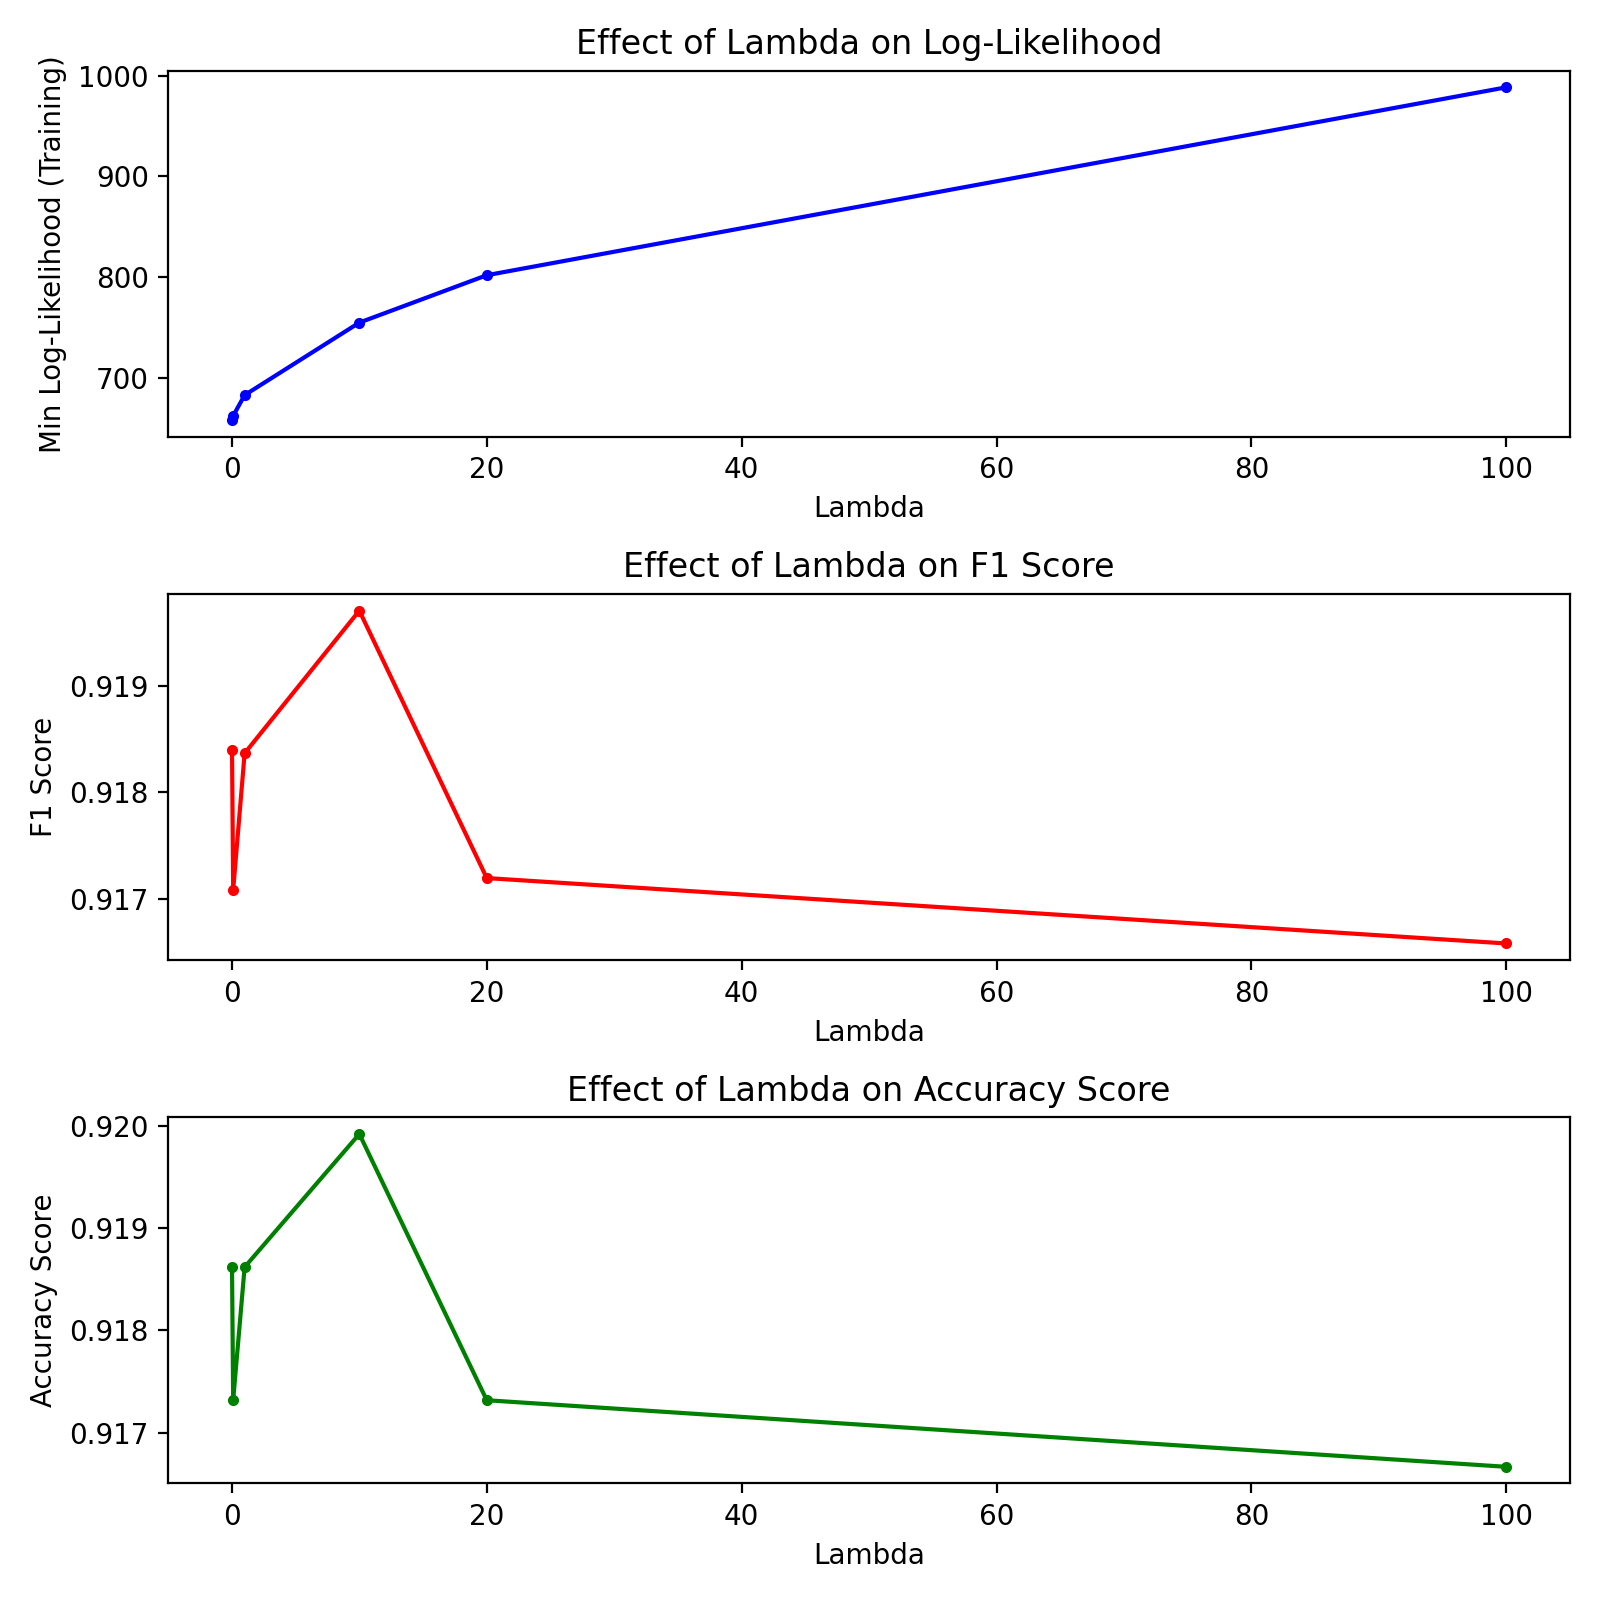

In [400]:
lambda_vals = list(results.keys())
min_log_likelihoods = [metrics["Minimum Log-Likelihood"] for metrics in results.values()]
test_accuracies = [metrics["Test Accuracy"] for metrics in results.values()]
f1_scores = [metrics["Test F1 Score"] for metrics in results.values()]

plt.figure(figsize=(8, 8))

plt.subplot(3, 1, 1)
plt.plot(lambda_vals, min_log_likelihoods, marker='o', color='blue', markersize=3)
plt.xlabel("Lambda")
plt.ylabel("Min Log-Likelihood (Training)")
plt.title("Effect of Lambda on Log-Likelihood")

plt.subplot(3, 1, 2)
plt.plot(lambda_vals, f1_scores, marker='o', color='red', markersize=3)
plt.xlabel("Lambda")
plt.ylabel("F1 Score")
plt.title("Effect of Lambda on F1 Score")

plt.subplot(3, 1, 3)
plt.plot(lambda_vals, test_accuracies, marker='o', color='green', markersize=3)
plt.xlabel("Lambda")
plt.ylabel("Accuracy Score")
plt.title("Effect of Lambda on Accuracy Score")

plt.tight_layout()
plt.show()

## 4c Composition of Weight Vector

<IPython.core.display.Javascript object>


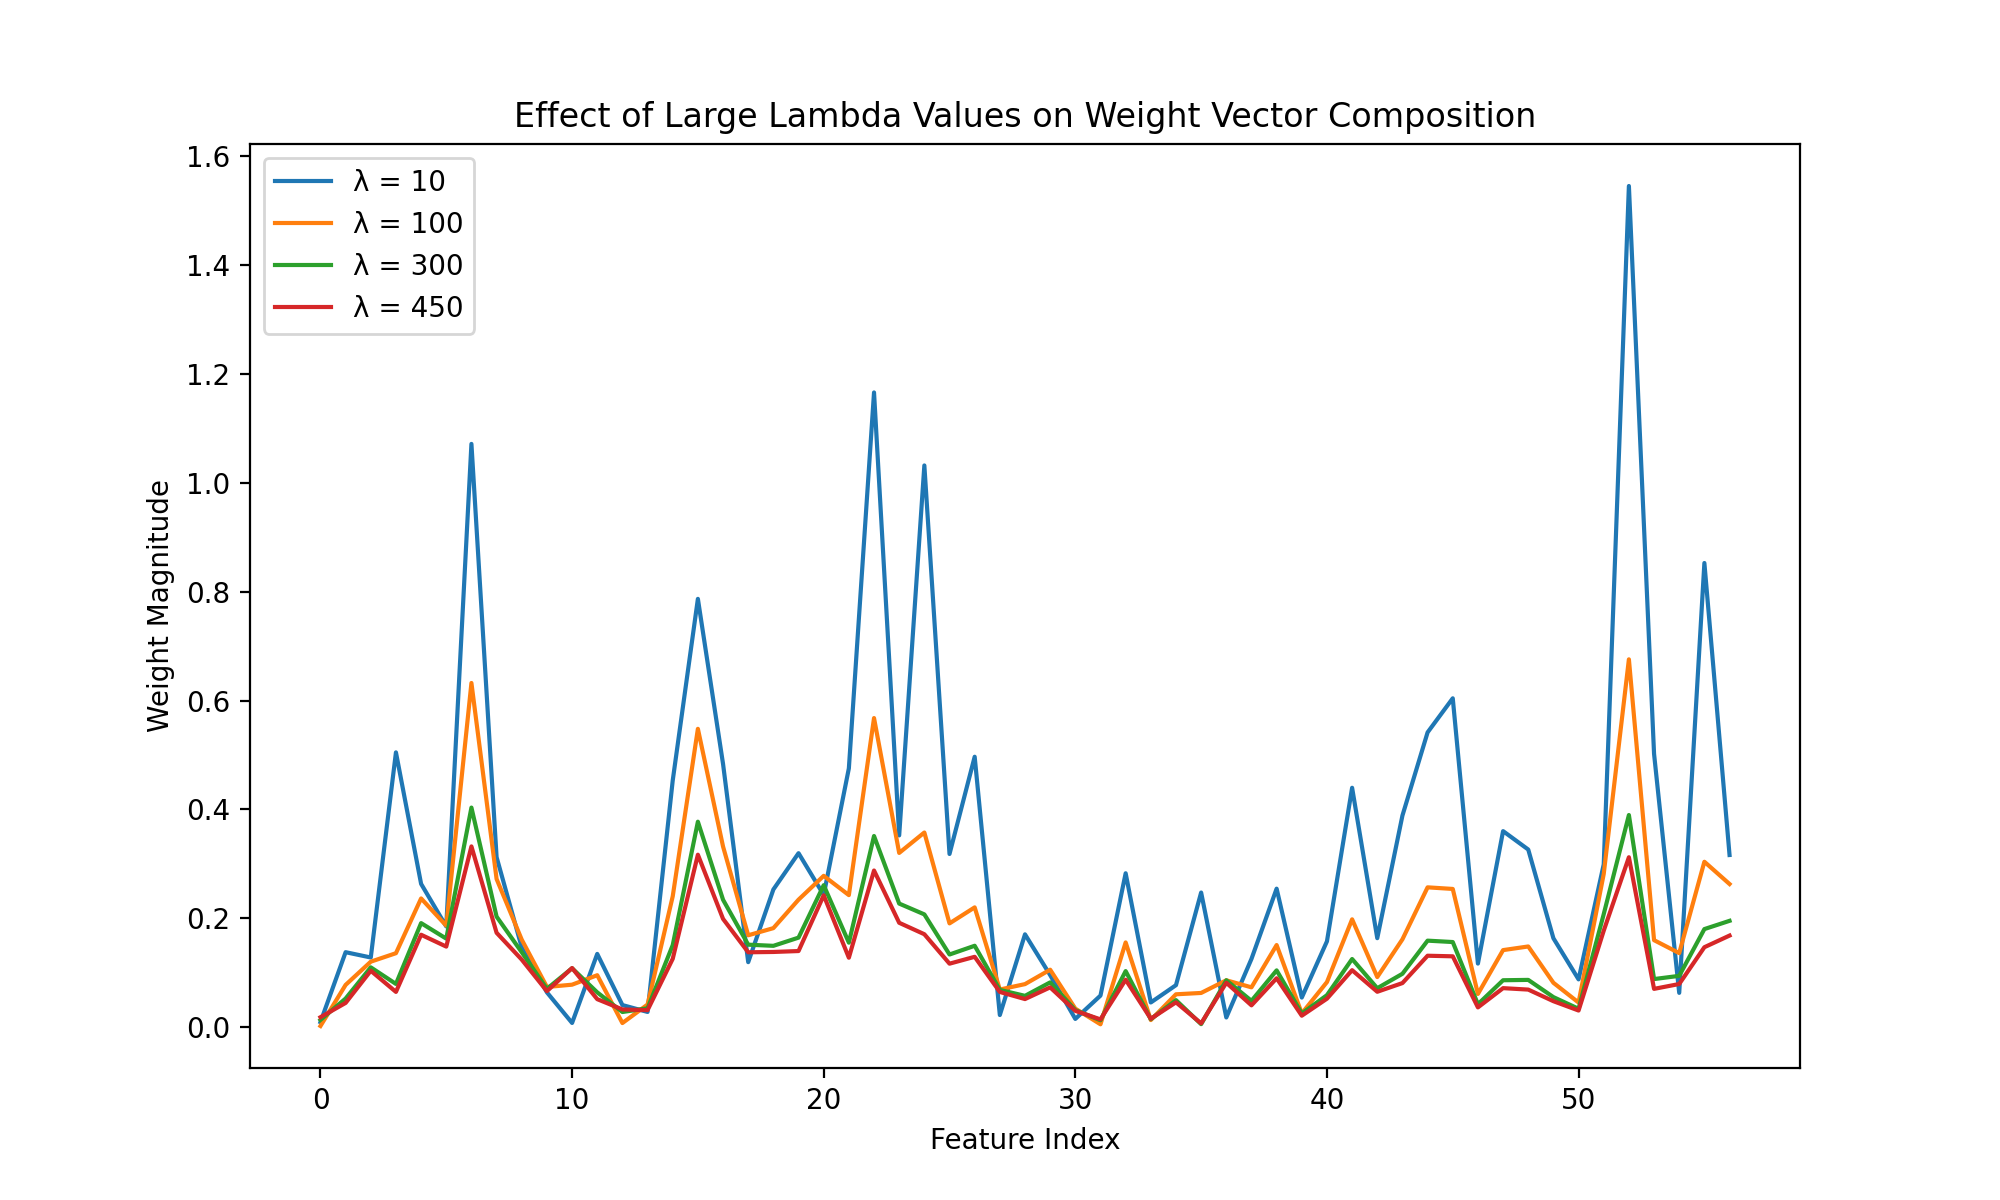

In [320]:
# YOUR CODE HERE
large_lambda_values = [10, 100, 300, 450]
lambda_weights = {}

for lambda_ in large_lambda_values:
    wz_gd_l2, _, _ = optimize(gd_l2(y, Xz, lambda_), w0, nepochs=500, verbose=False)
    lambda_weights[lambda_] = wz_gd_l2

plt.figure(figsize=(10, 6))
for lambda_, weights in lambda_weights.items():
    plt.plot(np.abs(weights), label=f'λ = {lambda_}')
plt.xlabel("Feature Index")
plt.ylabel("Weight Magnitude")
plt.title("Effect of Large Lambda Values on Weight Vector Composition")
plt.legend()
plt.show()

Interpret the effect:
As 
𝜆
λ increases, weights should generally become smaller in magnitude. Features with weights converging near zero may be less important for the classification task, while those remaining non-zero might indicate essential features.
High 
𝜆
λ values will likely reduce the model's variance but increase bias. This could lead to a trade-off where accuracy on training data might drop slightly due to underfitting, yet test accuracy and generalization could stabilize, particularly if there was noise or redundancy in the features.


analyzing the plot:

Feature Importance: Weights close to zero for high 
𝜆
λ values indicate features that regularization has deemed less essential, potentially due to noise or weak association with the target.
Intuition Check: You can also cross-reference your findings with the nature of the dataset’s features to see if the identified important features are intuitive for spam classification. For example, terms directly associated with spam might retain some influence even with larger 
𝜆
λ.

In [421]:
features[np.argsort(lambda_weights[450])[::-1][:5]].tolist()

['word_freq_remove',
 'word_freq_free',
 'char_freq_$',
 'word_freq_000',
 'word_freq_your']

## 5 Exploration (optional)

### Try gradient descent on the original data without using z-scores.

In [325]:
numpy.random.seed(0)
w0 = np.random.normal(size=D)
wz_gd_uns, vz_gd_uns, ez_gd_uns = optimize(gd(y, X), w0, nepochs=500, verbose=False)

/var/folders/0s/63ktljj55t12qgn_8z4nq4wm0000gn/T/ipykernel_76234/4219900393.py:7: RuntimeWarning: overflow encountered in exp
  return -np.log1p(np.exp(-x))
/var/folders/0s/63ktljj55t12qgn_8z4nq4wm0000gn/T/ipykernel_76234/743502101.py:15: RuntimeWarning: invalid value encountered in multiply
  log_likelihood = np.sum(y * logsigma(z) + (1 - y) * logsigma(-z))
/var/folders/0s/63ktljj55t12qgn_8z4nq4wm0000gn/T/ipykernel_76234/2533977827.py:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [335]:
print(vz_gd_uns[-10:])

[nan nan nan nan nan nan nan nan nan nan]


### Add a bias feature (make sure that you do not scale it).

In [349]:
def add_bias_feature(X):
    return np.hstack((np.ones((X.shape[0], 1)), X))

In [350]:
np.random.seed(0)

Xz_bias = add_bias_feature(Xz)
D = Xz_bias.shape[1]
w0 = np.random.normal(size=D)

In [351]:
wz_gd, vz_gd, ez_gd = optimize(gd(y, Xz_bias), w0, nepochs=500, verbose=True)
print('min log likelihood: ', vz_gd)

Epoch   0: f=  6532.301, eps=0.010000000
Epoch   1: f=  3514.056, eps=0.010500000
Epoch   2: f=  2326.530, eps=0.011025000
Epoch   3: f=  1632.122, eps=0.011576250
Epoch   4: f=  1305.739, eps=0.012155063
Epoch   5: f=  1124.545, eps=0.012762816
Epoch   6: f=  1001.694, eps=0.013400956
Epoch   7: f=   954.624, eps=0.014071004
Epoch   8: f=  1207.601, eps=0.007035502
Epoch   9: f=  1078.042, eps=0.007387277
Epoch  10: f=   893.098, eps=0.007756641
Epoch  11: f=   907.632, eps=0.003878321
Epoch  12: f=   781.241, eps=0.004072237
Epoch  13: f=   768.912, eps=0.004275848
Epoch  14: f=   759.992, eps=0.004489641
Epoch  15: f=   751.544, eps=0.004714123
Epoch  16: f=   743.313, eps=0.004949829
Epoch  17: f=   735.250, eps=0.005197320
Epoch  18: f=   727.350, eps=0.005457186
Epoch  19: f=   719.616, eps=0.005730046
Epoch  20: f=   712.065, eps=0.006016548
Epoch  21: f=   704.721, eps=0.006317375
Epoch  22: f=   697.623, eps=0.006633244
Epoch  23: f=   690.868, eps=0.006964906
Epoch  24: f=   

In [352]:
Xtestz_bias = add_bias_feature(Xtestz)

In [353]:
yhat_bias = predict(Xtestz_bias, wz_gd)
ypred_bias = classify(Xtestz_bias, wz_gd)
print(sklearn.metrics.confusion_matrix(ytest, ypred_bias))
print(sklearn.metrics.classification_report(ytest, ypred_bias))

[[895  46]
 [ 65 530]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       941
           1       0.92      0.89      0.91       595

    accuracy                           0.93      1536
   macro avg       0.93      0.92      0.92      1536
weighted avg       0.93      0.93      0.93      1536



### Try to reduce the training set size and compare MLE and MAP estimation (ideally using cross-validation).

In [357]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score

In [362]:
np.array([[10,20,30,40],
          [5,6,7,8],
          [100,200,300,400]])[0:2, :]

array([[10, 20, 30, 40],
       [ 5,  6,  7,  8]])

In [385]:
sample_size = int(0.5 * Xz.shape[0])
sample_indices = np.random.choice(range(0, sample_size), size=sample_size, replace=False)

kf = KFold(n_splits=5, shuffle=True, random_state=0)

mle_results, map_results = {'accuracy':[], 'f1':[]}, {'accuracy':[], 'f1':[]}

for train_index, val_index in kf.split(Xz[sample_indices,:]):
    X_train, X_val = Xz[train_index], Xz[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    
    w0 = np.random.normal(size=X_train.shape[1])
    w_mle, v_mle, _ = optimize(gd(y_train, X_train), w0, nepochs=500, verbose=False)
    y_pred_mle = classify(X_val, w_mle)
    mle_results['accuracy'].append(accuracy_score(y_val, y_pred_mle))
    mle_results['f1'].append(f1_score(y_val, y_pred_mle, average='weighted'))
    
    lambda_ = 0.1
    w_map, v_map, _ = optimize(gd_l2(y_train, X_train, lambda_), w0, nepochs=500, verbose=False)
    y_pred_map = classify(X_val, w_map)
    map_results['accuracy'].append(accuracy_score(y_val, y_pred_map))
    map_results['f1'].append(f1_score(y_val, y_pred_map, average='weighted'))

In [386]:
for key in mle_results.keys():
    print(f'MLE -- CV {key} mean: {np.mean(mle_results[key]):.4f}')
print('******************')
for key in map_results.keys():
    print(f'MAP -- CV {key} mean: {np.mean(map_results[key]):.4f}')

MLE -- CV accuracy mean: 0.9412
MLE -- CV f1 mean: 0.9404
******************
MAP -- CV accuracy mean: 0.9426
MAP -- CV f1 mean: 0.9418


### Run a logistic regression method from some existing library. Do you get the same results?

In [404]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [406]:
log_reg = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=500, random_state=0)
log_reg.fit(Xz, y)

y_pred_test = log_reg.predict(Xtestz)

test_accuracy = accuracy_score(ytest, y_pred_test)
print("Test Accuracy:", test_accuracy)

print("Classification Report:")
print(classification_report(ytest, y_pred_test))

Test Accuracy: 0.9244791666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       941
           1       0.92      0.88      0.90       595

    accuracy                           0.92      1536
   macro avg       0.92      0.92      0.92      1536
weighted avg       0.92      0.92      0.92      1536



### 5 Exploration: PyTorch

In [441]:
# if you want to experiment, here is an implementation of logistic
# regression in PyTorch
import math
import torch
import torch.nn as nn
import torch.utils.data
import torch.nn.functional as F

# prepare the data
Xztorch = torch.FloatTensor(Xz)
ytorch = torch.LongTensor(y)
train = torch.utils.data.TensorDataset(Xztorch, ytorch)


# manual implementation of logistic regression (without bias)
class LogisticRegression(nn.Module):
    def __init__(self, D, C):
        super(LogisticRegression, self).__init__()
        self.weights = torch.nn.Parameter(
            torch.randn(D, C) / math.sqrt(D)
        )  # xavier initialization
        self.register_parameter("W", self.weights)

    def forward(self, x):
        out = torch.matmul(x, self.weights)
        out = F.log_softmax(out)
        return out


# define the objective and update function. here we ignore the learning rates
# and parameters given to us by optimize (they are stored in the PyTorch model
# and optimizer, resp., instead)
def opt_pytorch():
    model = LogisticRegression(D, 2)
    criterion = nn.NLLLoss(reduction="sum")
    # change the next line to try different optimizers
    # optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    def objective(_):
        outputs = model(Xztorch)
        return criterion(outputs, ytorch)

    def update(_1, _2):
        for i, (examples, labels) in enumerate(train_loader):
            outputs = model(examples)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        W = model.state_dict()["W"]
        w = W[:, 1] - W[:, 0]
        return w

    return (objective, update)

In [442]:
# run the optimizer
learning_rate = 0.01
batch_size = 100  # number of data points to sample for gradient estimate
shuffle = True  # sample with replacement (false) or without replacement (true)

train_loader = torch.utils.data.DataLoader(train, batch_size, shuffle=True)
wz_t, vz_t, _ = optimize(opt_pytorch(), None, nepochs=100, eps0=None, verbose=True)

Epoch   0: f=  2841.500, eps=       nan
Epoch   1: f=   908.735, eps=       nan
Epoch   2: f=   791.234, eps=       nan
Epoch   3: f=   749.157, eps=       nan
Epoch   4: f=   727.209, eps=       nan
Epoch   5: f=   713.591, eps=       nan
Epoch   6: f=   703.956, eps=       nan
Epoch   7: f=   697.228, eps=       nan
Epoch   8: f=   692.373, eps=       nan
Epoch   9: f=   689.619, eps=       nan
Epoch  10: f=   686.883, eps=       nan
Epoch  11: f=   683.939, eps=       nan
Epoch  12: f=   681.789, eps=       nan
Epoch  13: f=   680.960, eps=       nan
Epoch  14: f=   680.269, eps=       nan
Epoch  15: f=   679.088, eps=       nan
Epoch  16: f=   677.551, eps=       nan
Epoch  17: f=   676.960, eps=       nan
Epoch  18: f=   676.113, eps=       nan
Epoch  19: f=   675.708, eps=       nan
Epoch  20: f=   675.182, eps=       nan
Epoch  21: f=   674.673, eps=       nan
Epoch  22: f=   674.281, eps=       nan
Epoch  23: f=   673.853, eps=       nan
Epoch  24: f=   674.853, eps=       nan
